<h1 style="color:green;">Spotify Playlist Clustering</h1>
<p> In this Project , we are working with the top 1000+ global playlist on spotify
    where we will cluster the songs in the playlist based on various audio features
    of songs like danceability,energy,mode,acousticness,instrumentalness etc.
<p>
<p> The data has been entirely scraped from the spotify API using the spotipy module.
     Here is the snapshot of the playlist which we are working on.
<p>

<img src="top_1000plus.png">

<img src="playlist_pic.png">

<h2>Data Cleaning and Feature Engineering</h2>

In [61]:
#Importing the default libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

random.seed(10)
sns.set()

In [62]:
#Reading the dataset
df_spot=pd.read_csv("spot_data.csv")
df_spot.head()

Unnamed: 0                      id  \
0           0  78f9pUmqxdrPpUeidwwagK   
1           1  3NdDpSvN911VPGivFlV5d0   
2           2  33koOQs551ijjVmLbmrcDc   
3           3  5NQbUaeTEOGdD6hHcre0dZ   
4           4  7rklm17yoayxw45lpzv5uv   

                                               title        all_artists  \
0  Levitate - From The Original Motion Picture “P...    Imagine Dragons   
1  I Don’t Wanna Live Forever (Fifty Shades Darke...       Taylor Swift   
2                  Yellow - Live from Spotify London           Coldplay   
3                              679 (feat. Remy Boyz)          Remy Boyz   
4  Se på mig nu (feat. Linnea Henriksson) - Singe...  Linnea Henriksson   

   popularity release_date  danceability  energy  key  loudness  mode  \
0           0   2016-11-29         0.310   0.681   11    -5.520     1   
1           0   2016-12-09         0.735   0.451    0    -8.374     1   
2          58   2016-12-16         0.223   0.439   11   -10.456     1   
3          73   2015-06-29         0.618   0.717    7    -5.738     1   
4          52   2016-10-28         0.622   0.729    0    -7.929     0   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0       0.03310          0.000000     0.185   0.2330  106.784       198173   
1       0.06310          0.000013     0.325   0.0862  117.973       245200   
2       0.44700          0.014100     0.926   0.1190  165.899       252467   
3       0.00256          0.000000     0.625   0.6030  190.050       196693   
4       0.10800          0.000006     0.163   0.5320  106.053       250040   

   time_signature  
0               5  
1               4  
2               4  
3               4  
4               4

In [63]:
#Checking for null values in the dataset
df_spot.isnull().sum()

Unnamed: 0          0
id                  0
title               0
all_artists         0
popularity          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [64]:
df_spot.shape

(1956, 18)

In [65]:
#Dropping the duplicates to reduce redundant data
df_spot = df_spot.drop_duplicates(['release_date','all_artists'],keep= 'last')
df_spot.head()

Unnamed: 0                      id  \
0           0  78f9pUmqxdrPpUeidwwagK   
1           1  3NdDpSvN911VPGivFlV5d0   
2           2  33koOQs551ijjVmLbmrcDc   
3           3  5NQbUaeTEOGdD6hHcre0dZ   
4           4  7rklm17yoayxw45lpzv5uv   

                                               title        all_artists  \
0  Levitate - From The Original Motion Picture “P...    Imagine Dragons   
1  I Don’t Wanna Live Forever (Fifty Shades Darke...       Taylor Swift   
2                  Yellow - Live from Spotify London           Coldplay   
3                              679 (feat. Remy Boyz)          Remy Boyz   
4  Se på mig nu (feat. Linnea Henriksson) - Singe...  Linnea Henriksson   

   popularity release_date  danceability  energy  key  loudness  mode  \
0           0   2016-11-29         0.310   0.681   11    -5.520     1   
1           0   2016-12-09         0.735   0.451    0    -8.374     1   
2          58   2016-12-16         0.223   0.439   11   -10.456     1   
3          73   2015-06-29         0.618   0.717    7    -5.738     1   
4          52   2016-10-28         0.622   0.729    0    -7.929     0   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0       0.03310          0.000000     0.185   0.2330  106.784       198173   
1       0.06310          0.000013     0.325   0.0862  117.973       245200   
2       0.44700          0.014100     0.926   0.1190  165.899       252467   
3       0.00256          0.000000     0.625   0.6030  190.050       196693   
4       0.10800          0.000006     0.163   0.5320  106.053       250040   

   time_signature  
0               5  
1               4  
2               4  
3               4  
4               4

In [66]:
df_spot.shape

(1395, 18)

In [67]:
#A function to filter out any [] brackets in the column and then extracting the year part from the release date
import re
def filter_name(value):
    return re.sub(r"\['(.*?)'\]", r"\1",value)
df_spot['title']=df_spot['title'].apply(lambda x: filter_name(x))
df_spot['release_date'] = pd.DatetimeIndex(df_spot['release_date']).year

In [68]:
df_spot.head()

Unnamed: 0                      id  \
0           0  78f9pUmqxdrPpUeidwwagK   
1           1  3NdDpSvN911VPGivFlV5d0   
2           2  33koOQs551ijjVmLbmrcDc   
3           3  5NQbUaeTEOGdD6hHcre0dZ   
4           4  7rklm17yoayxw45lpzv5uv   

                                               title        all_artists  \
0  Levitate - From The Original Motion Picture “P...    Imagine Dragons   
1  I Don’t Wanna Live Forever (Fifty Shades Darke...       Taylor Swift   
2                  Yellow - Live from Spotify London           Coldplay   
3                              679 (feat. Remy Boyz)          Remy Boyz   
4  Se på mig nu (feat. Linnea Henriksson) - Singe...  Linnea Henriksson   

   popularity  release_date  danceability  energy  key  loudness  mode  \
0           0          2016         0.310   0.681   11    -5.520     1   
1           0          2016         0.735   0.451    0    -8.374     1   
2          58          2016         0.223   0.439   11   -10.456     1   
3          73          2015         0.618   0.717    7    -5.738     1   
4          52          2016         0.622   0.729    0    -7.929     0   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0       0.03310          0.000000     0.185   0.2330  106.784       198173   
1       0.06310          0.000013     0.325   0.0862  117.973       245200   
2       0.44700          0.014100     0.926   0.1190  165.899       252467   
3       0.00256          0.000000     0.625   0.6030  190.050       196693   
4       0.10800          0.000006     0.163   0.5320  106.053       250040   

   time_signature  
0               5  
1               4  
2               4  
3               4  
4               4

In [69]:
#Dropping this column as there is no use of it.
df_spot=df_spot.drop('Unnamed: 0',axis=1)

In [70]:
df_spot.head()

id                                              title  \
0  78f9pUmqxdrPpUeidwwagK  Levitate - From The Original Motion Picture “P...   
1  3NdDpSvN911VPGivFlV5d0  I Don’t Wanna Live Forever (Fifty Shades Darke...   
2  33koOQs551ijjVmLbmrcDc                  Yellow - Live from Spotify London   
3  5NQbUaeTEOGdD6hHcre0dZ                              679 (feat. Remy Boyz)   
4  7rklm17yoayxw45lpzv5uv  Se på mig nu (feat. Linnea Henriksson) - Singe...   

         all_artists  popularity  release_date  danceability  energy  key  \
0    Imagine Dragons           0          2016         0.310   0.681   11   
1       Taylor Swift           0          2016         0.735   0.451    0   
2           Coldplay          58          2016         0.223   0.439   11   
3          Remy Boyz          73          2015         0.618   0.717    7   
4  Linnea Henriksson          52          2016         0.622   0.729    0   

   loudness  mode  acousticness  instrumentalness  liveness  valence    tempo  \
0    -5.520     1       0.03310          0.000000     0.185   0.2330  106.784   
1    -8.374     1       0.06310          0.000013     0.325   0.0862  117.973   
2   -10.456     1       0.44700          0.014100     0.926   0.1190  165.899   
3    -5.738     1       0.00256          0.000000     0.625   0.6030  190.050   
4    -7.929     0       0.10800          0.000006     0.163   0.5320  106.053   

   duration_ms  time_signature  
0       198173               5  
1       245200               4  
2       252467               4  
3       196693               4  
4       250040               4

In [71]:
#Function to find the total number of unique values and the unique values to determine the continuous and discrete columns
def findunique(df):
    for i in df.columns:
        print("\n {} \n".format(i),df[i].unique())
        print("\n {}: ".format("Count"),df[i].nunique())
findunique(df_spot)


 id 
 ['78f9pUmqxdrPpUeidwwagK' '3NdDpSvN911VPGivFlV5d0'
 '33koOQs551ijjVmLbmrcDc' ... '0rt63HYAAIzUZo5O2D0uA6'
 '1fEgtkMkRbNN1aaxHTmTMY' '0y60itmpH0aPKsFiGxmtnh']

 Count:  1395

 title 
 ['Levitate - From The Original Motion Picture “Passengers”'
 'I Don’t Wanna Live Forever (Fifty Shades Darker) - From "Fifty Shades Darker (Original Motion Picture Soundtrack)"'
 'Yellow - Live from Spotify London' ... 'Visiting Hours' 'Kevlarsjäl'
 'Wait a Minute!']

 Count:  1370

 all_artists 
 ['Imagine Dragons' 'Taylor Swift' 'Coldplay' 'Remy Boyz'
 'Linnea Henriksson' 'Danny Saucedo' 'Maluma' 'Nicky Jam' 'Camila Cabello'
 'Anne-Marie' 'Pretty Sister' 'Daft Punk' 'Zeeba' 'James TW'
 'Zara Larsson' 'Olly Murs' 'Tjuvjakt' 'Hov1' 'Phoebe Ryan'
 'Kendrick Lamar' 'Lukas Graham' 'Twenty One Pilots' 'Jon Bellion'
 'Shapov' 'John Legend' 'Nicki Minaj' 'Stanaj' 'James Arthur'
 'Luke Christopher' 'Lil Yachty' 'Drake' 'The Score' 'Stiftelsen'
 'Years & Years' 'ROZES' 'Martin Jensen' 'Tiësto' 'Joel Adams'


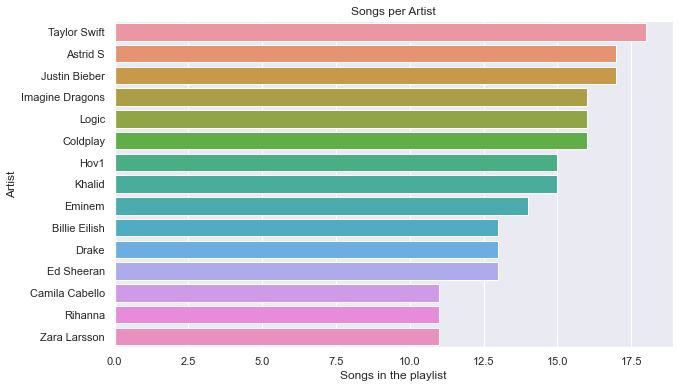

In [72]:
#Visualizing the artists according to the number of songs
fav_artists = df_spot['all_artists'].value_counts().sort_values(ascending=False).index
ax = sns.countplot(y=df_spot['all_artists'], order=fav_artists[:15])
plt.xlabel('Songs in the playlist')
plt.ylabel('Artist')
plt.title('Songs per Artist')
sns.set(rc={'figure.figsize':(26,20)})

In [73]:
#Let us check the songs by Taylor Swift which are present in the playlist
df_spot.loc[df_spot['all_artists']=='Taylor Swift']

id  \
1     3NdDpSvN911VPGivFlV5d0   
489   6uFsE1JgZ20EXyU0JQZbUR   
494   7zgqtptZvhf8GEmdsM2vp2   
533   5Gd19NupVe5X8bAqxf9Iaz   
542   7sRpqj3yUcacG5KryFfLML   
964   1R0a2iXumgCiFb7HEZ7gUE   
1216  2lXDbdbBw7lJVCWHkYxdep   
1217  12pbmOrWJNjU0TAFZEw2G7   
1476  2slqvGLwzZZYsT4K4Y1GBC   
1486  1NmVZsG18CzCAtw7rnV3yA   
1495  3RauEVgRgj1IuWdJ9fDs70   
1711  5P2bHCDM2tsgIaYWsZMhu5   
1844  3hUxzQpSfdDqwM3ZTFQY0K   
1861  670fUmXf4KQekzbEgaXyPA   
1911  5enxwA8aAbwZbf5qCHORXi   
1931  77sMIMlNaSURUAXq5coCxE   
1942  6N1K5OVVCopBjGViHs2IvP   
1948  1zIzd27gmbNrWWkMCEWmgC   

                                                  title   all_artists  \
1     I Don’t Wanna Live Forever (Fifty Shades Darke...  Taylor Swift   
489                            Look What You Made Me Do  Taylor Swift   
494                                    ...Ready For It?  Taylor Swift   
533                                            Gorgeous  Taylor Swift   
542                               Call It What You Want  Taylor Swift   
964                                      Don’t Blame Me  Taylor Swift   
1216                                     Wildest Dreams  Taylor Swift   
1217                                                Red  Taylor Swift   
1476        Only The Young - Featured in Miss Americana  Taylor Swift   
1486                                              Clean  Taylor Swift   
1495                                            The Man  Taylor Swift   
1711                                  my tears ricochet  Taylor Swift   
1844                                             august  Taylor Swift   
1861                                           dorothea  Taylor Swift   
1911  All Too Well (10 Minute Version) (Taylor's Ver...  Taylor Swift   
1931                        Fearless (Taylor’s Version)  Taylor Swift   
1942       The Joker And The Queen (feat. Taylor Swift)  Taylor Swift   
1948  Message In A Bottle (Taylor's Version) (From T...  Taylor Swift   

      popularity  release_date  danceability  energy  key  loudness  mode  \
1              0          2016         0.735   0.451    0    -8.374     1   
489            0          2017         0.773   0.680    9    -6.378     0   
494            0          2017         0.615   0.779    2    -6.454     1   
533            0          2017         0.791   0.529    7    -6.870     1   
542            0          2017         0.602   0.502    9    -9.926     1   
964           74          2017         0.615   0.534    9    -6.719     0   
1216           0          2014         0.553   0.664    8    -7.417     1   
1217           0          2012         0.609   0.890    1    -4.258     0   
1476          61          2020         0.560   0.780    5    -4.895     0   
1486          63          2014         0.815   0.377    4    -7.754     1   
1495          75          2019         0.777   0.658    0    -5.191     1   
1711          62          2020         0.456   0.265    0   -10.663     1   
1844          76          2020         0.532   0.623    5    -9.208     1   
1861          61          2020         0.605   0.488    4    -8.322     1   
1911          82          2021         0.631   0.518    0    -8.771     1   
1931          67          2021         0.569   0.741    5    -4.963     1   
1942          80          2022         0.528   0.309    0    -7.398     1   
1948          43          2022         0.615   0.763    7    -6.430     1   

      acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
1          0.06310          0.000013    0.3250   0.0862  117.973       245200   
489        0.21300          0.000016    0.1220   0.4970  128.062       211859   
494        0.06650          0.000000    0.1550   0.4530  160.000       208198   
533        0.06520          0.000013    0.2180   0.4280   91.981       209680   
542        0.17300          0.000187    0.4100   0.2370  163.961       203507   
964        0.10600          0.000018    0.0607   0.1930  135.917       236413  

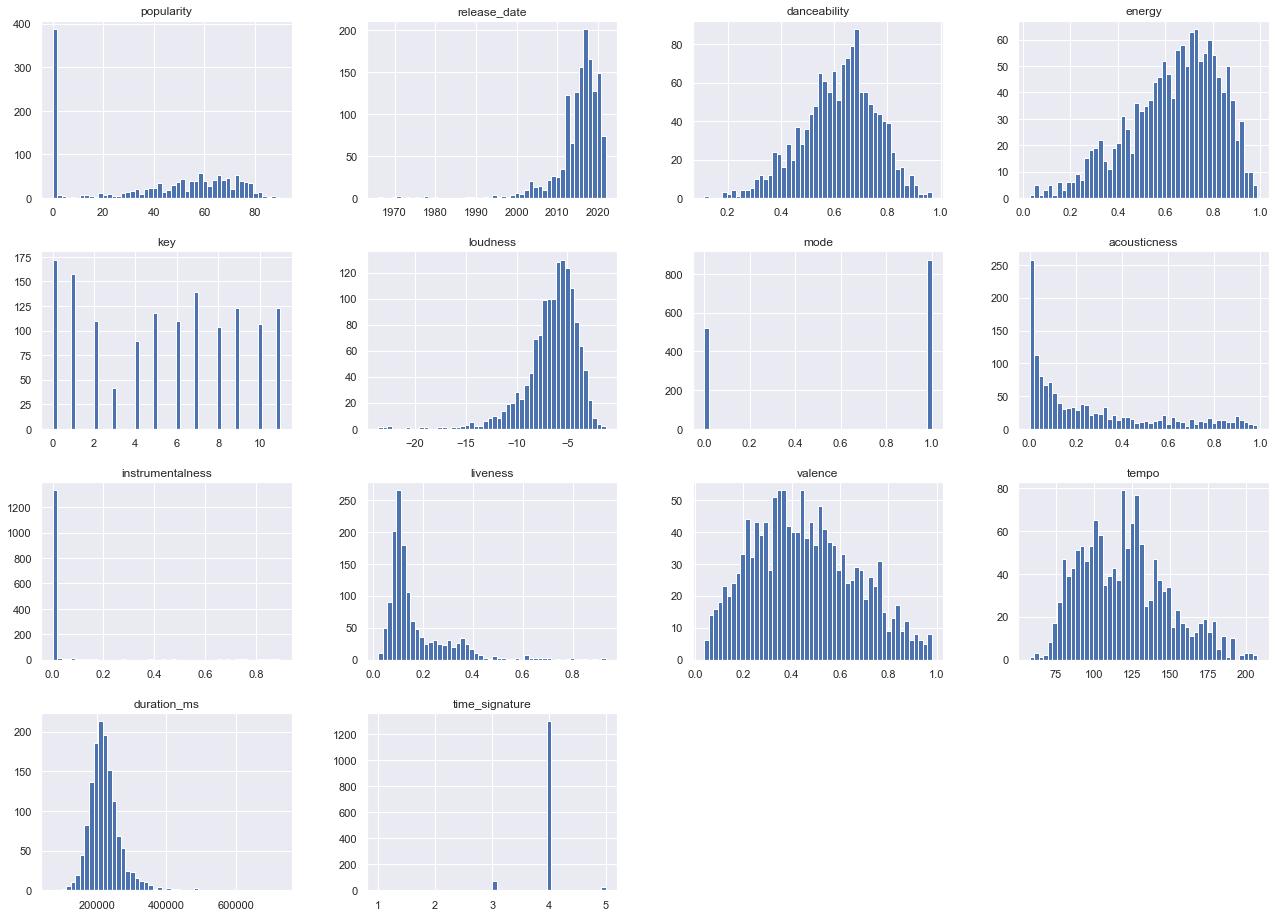

In [74]:
#Visualiizing the histogram plot of each feature in bins of 50
df_spot.hist(bins=50, figsize=(22,16), color='b')
plt.show()

In [75]:
#Displaying the distribution table of the dataset
df_spot.describe()

popularity  release_date  danceability       energy          key  \
count  1395.000000   1395.000000   1395.000000  1395.000000  1395.000000   
mean     40.046595   2015.205735      0.617052     0.634744     5.336918   
std      29.049974      5.774080      0.139645     0.190670     3.651777   
min       0.000000   1966.000000      0.111000     0.027900     0.000000   
25%       0.000000   2014.000000      0.529000     0.516000     2.000000   
50%      49.000000   2017.000000      0.632000     0.663000     6.000000   
75%      65.000000   2019.000000      0.715000     0.782500     9.000000   
max      90.000000   2022.000000      0.967000     0.988000    11.000000   

          loudness         mode  acousticness  instrumentalness    liveness  \
count  1395.000000  1395.000000   1395.000000       1395.000000  1395.00000   
mean     -6.522054     0.626523      0.261331          0.010788     0.17134   
std       2.571963     0.483901      0.278033          0.077387     0.12979   
min     -23.625000     0.000000      0.000026          0.000000     0.02150   
25%      -7.703000     0.000000      0.035750          0.000000     0.09435   
50%      -6.076000     1.000000      0.148000          0.000000     0.11900   
75%      -4.832000     1.000000      0.412500          0.000022     0.20450   
max      -1.203000     1.000000      0.987000          0.896000     0.93400   

           valence        tempo    duration_ms  time_signature  
count  1395.000000  1395.000000    1395.000000     1395.000000  
mean      0.451187   119.730703  222432.151971        3.966308  
std       0.211969    28.644547   50223.340260        0.267053  
min       0.037500    57.860000   71519.000000        1.000000  
25%       0.286500    97.089000  192851.500000        4.000000  
50%       0.437000   119.899000  215827.000000        4.000000  
75%       0.600500   138.566500  242121.500000        4.000000  
max       0.979000   207.476000  728413.000000        5.000000

In [76]:
def box_plotting(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

In [77]:
df_spotcol=['popularity', 'release_date','danceability', 'energy', 'key', 'loudness', 'mode', 'acousticness','instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms','time_signature']

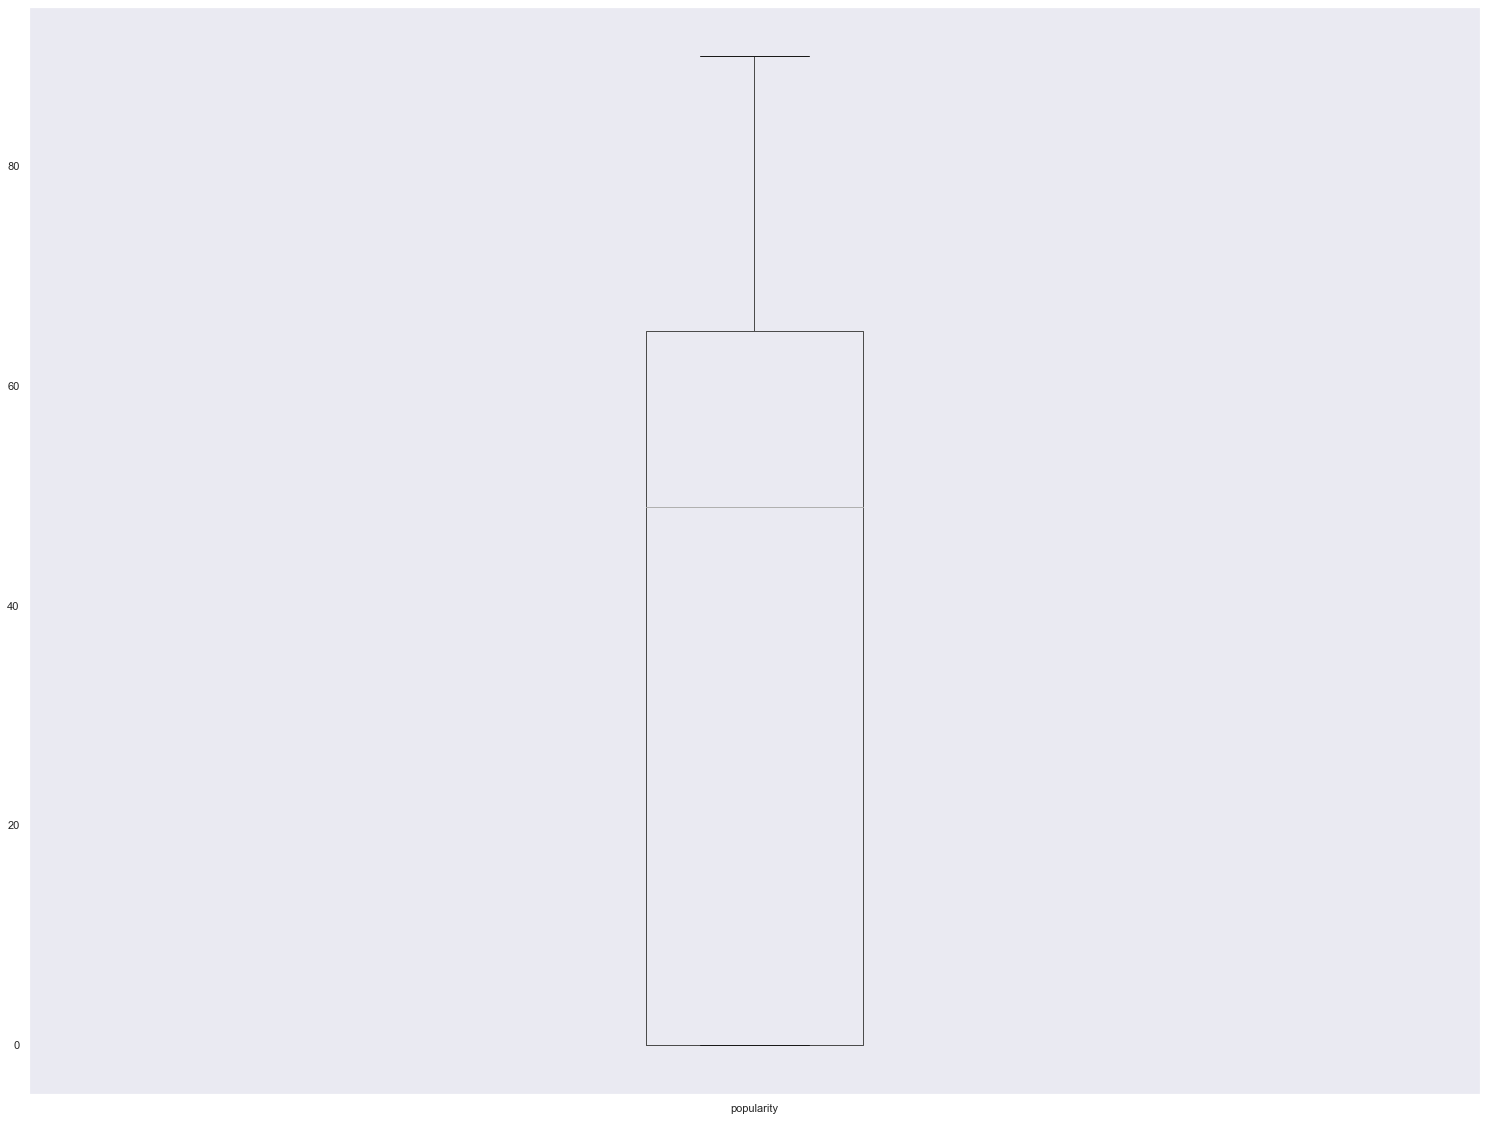

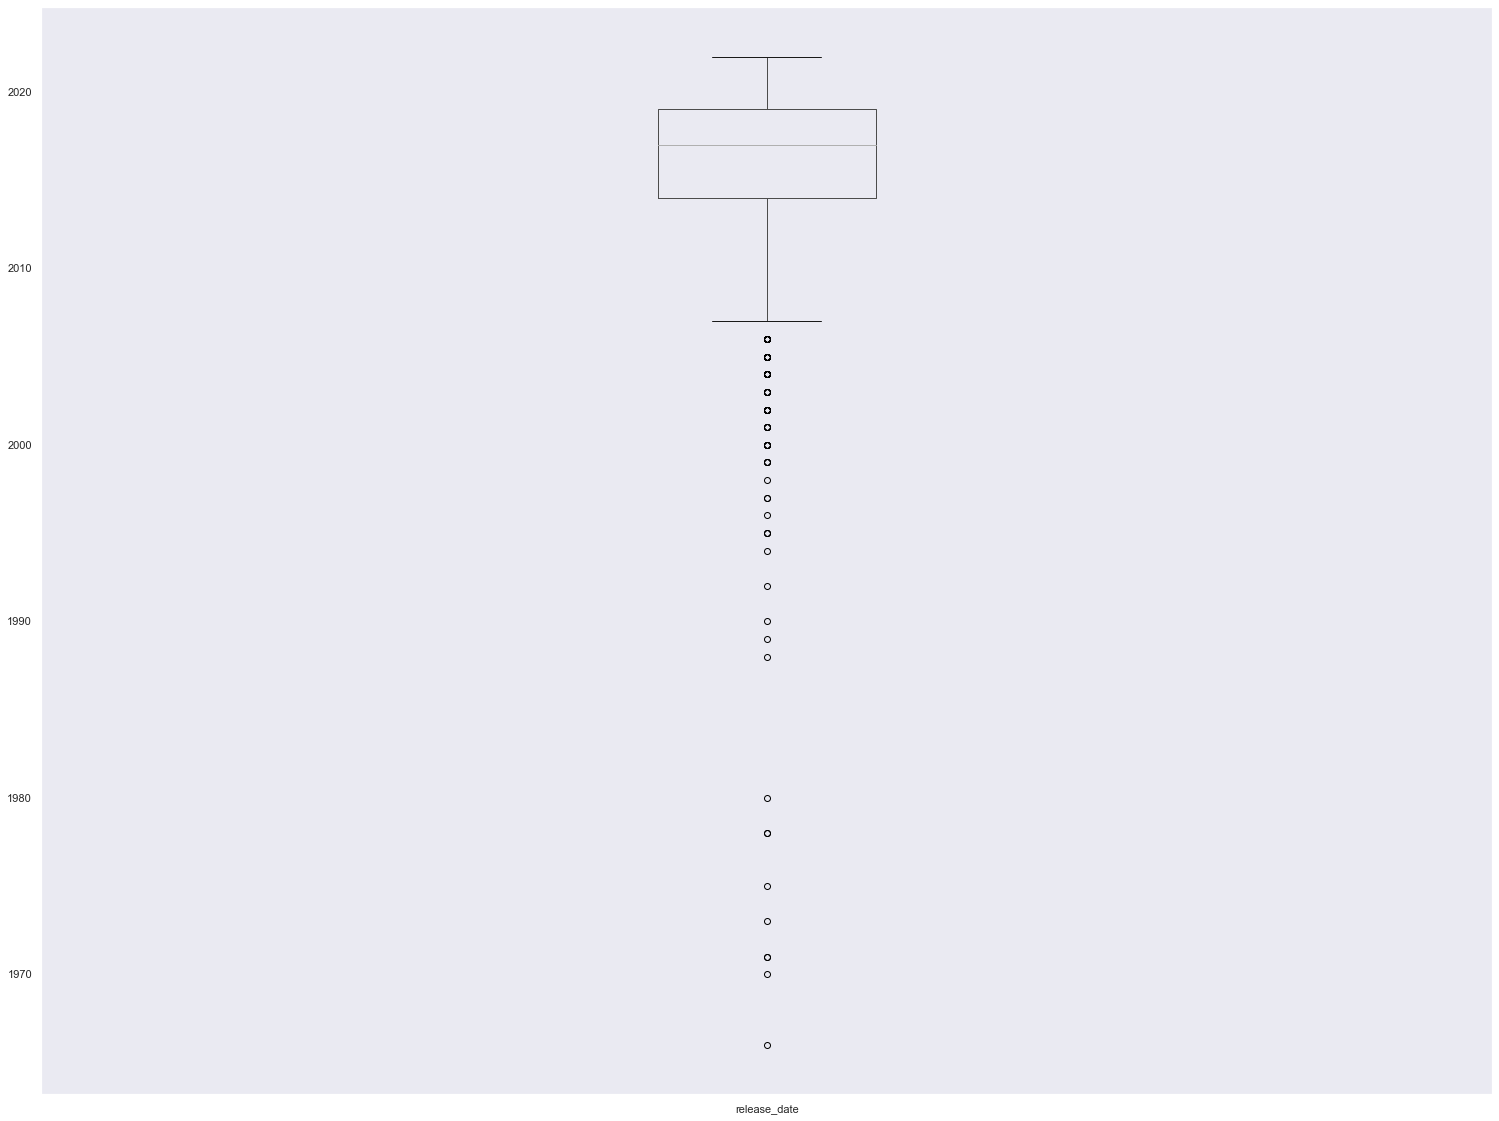

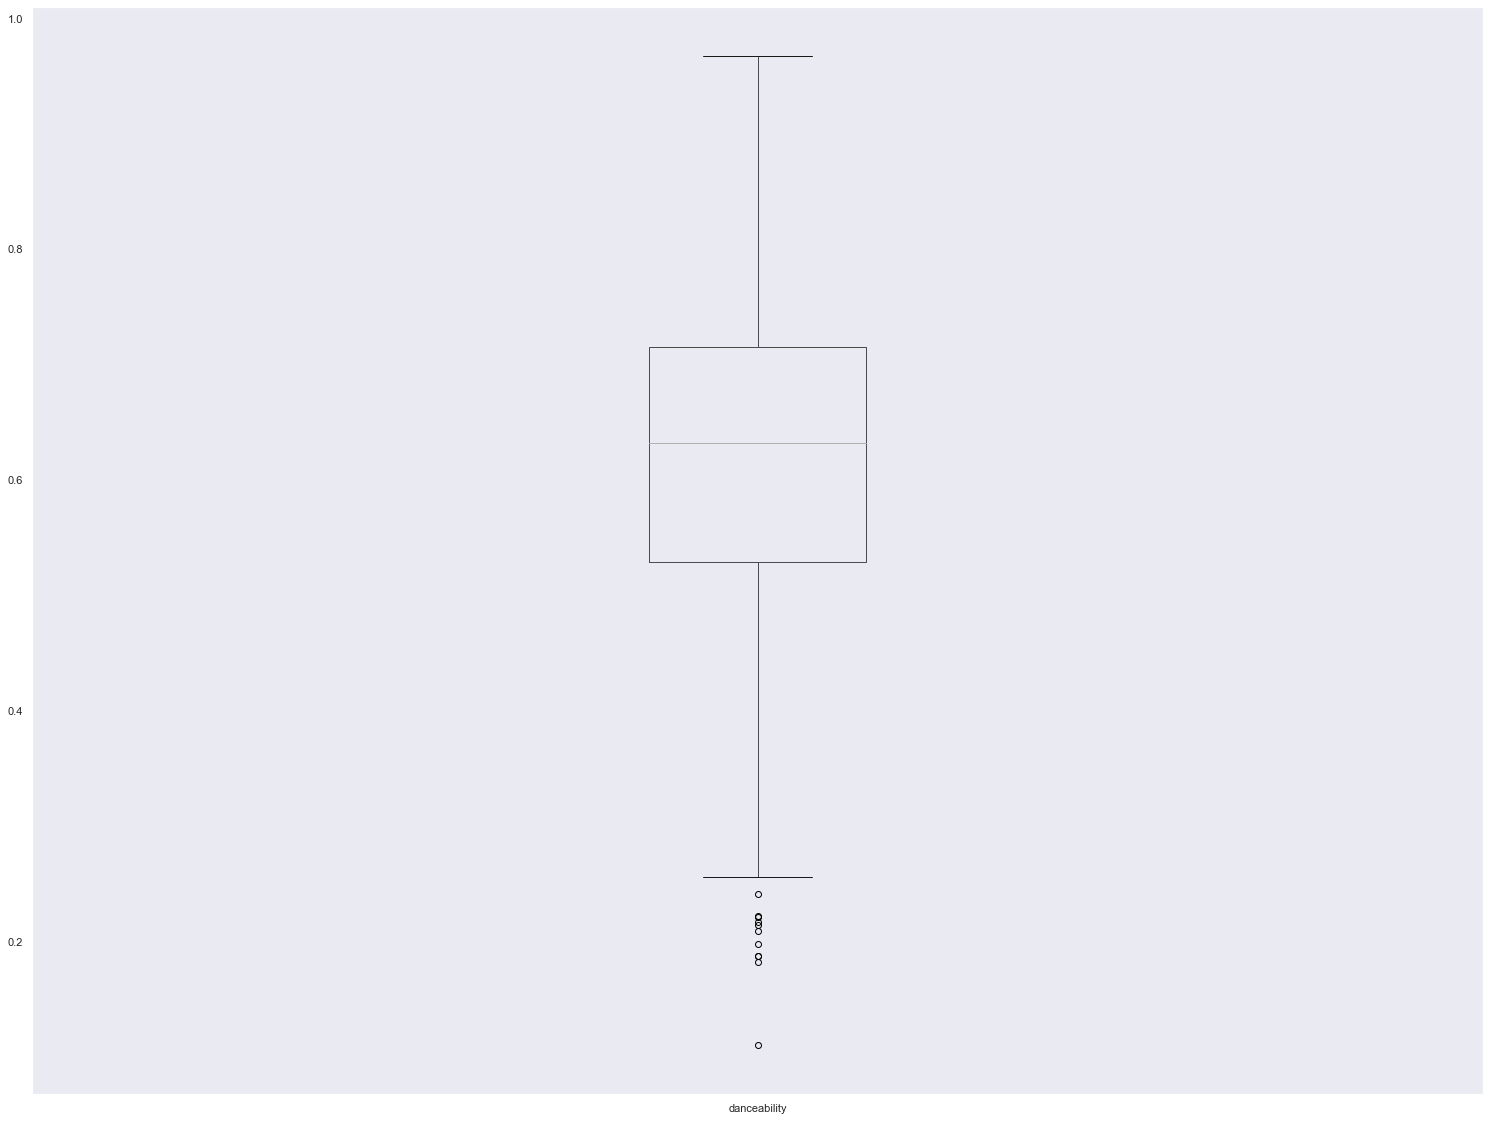

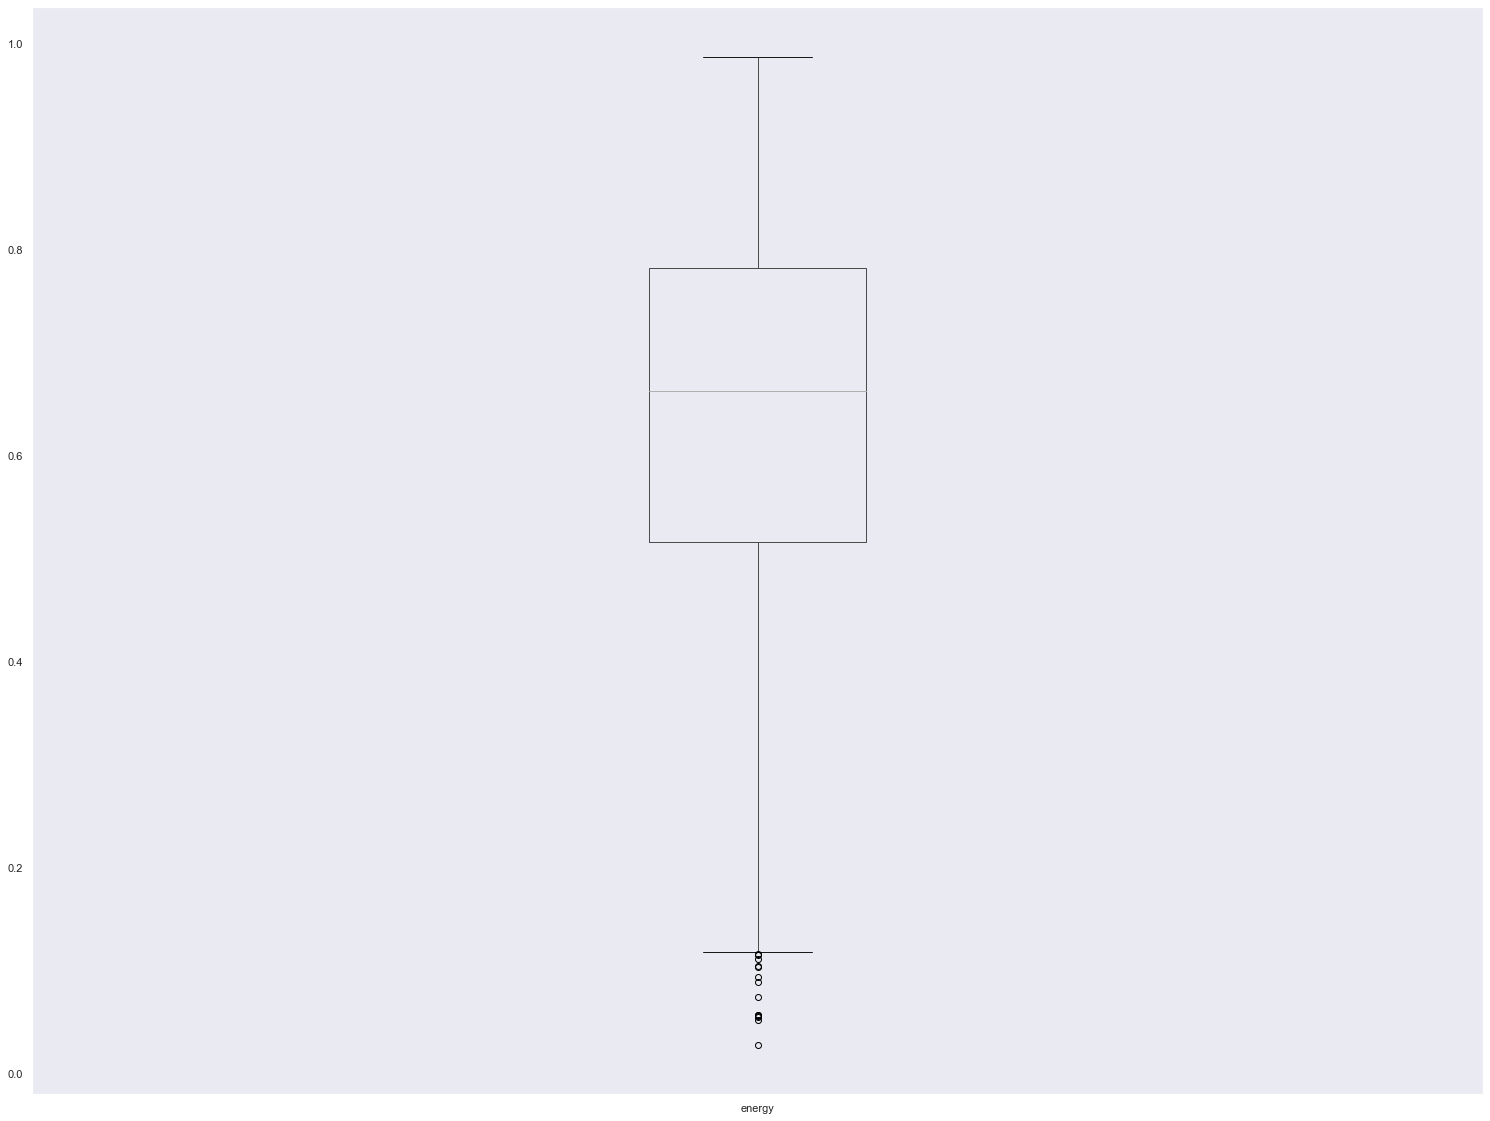

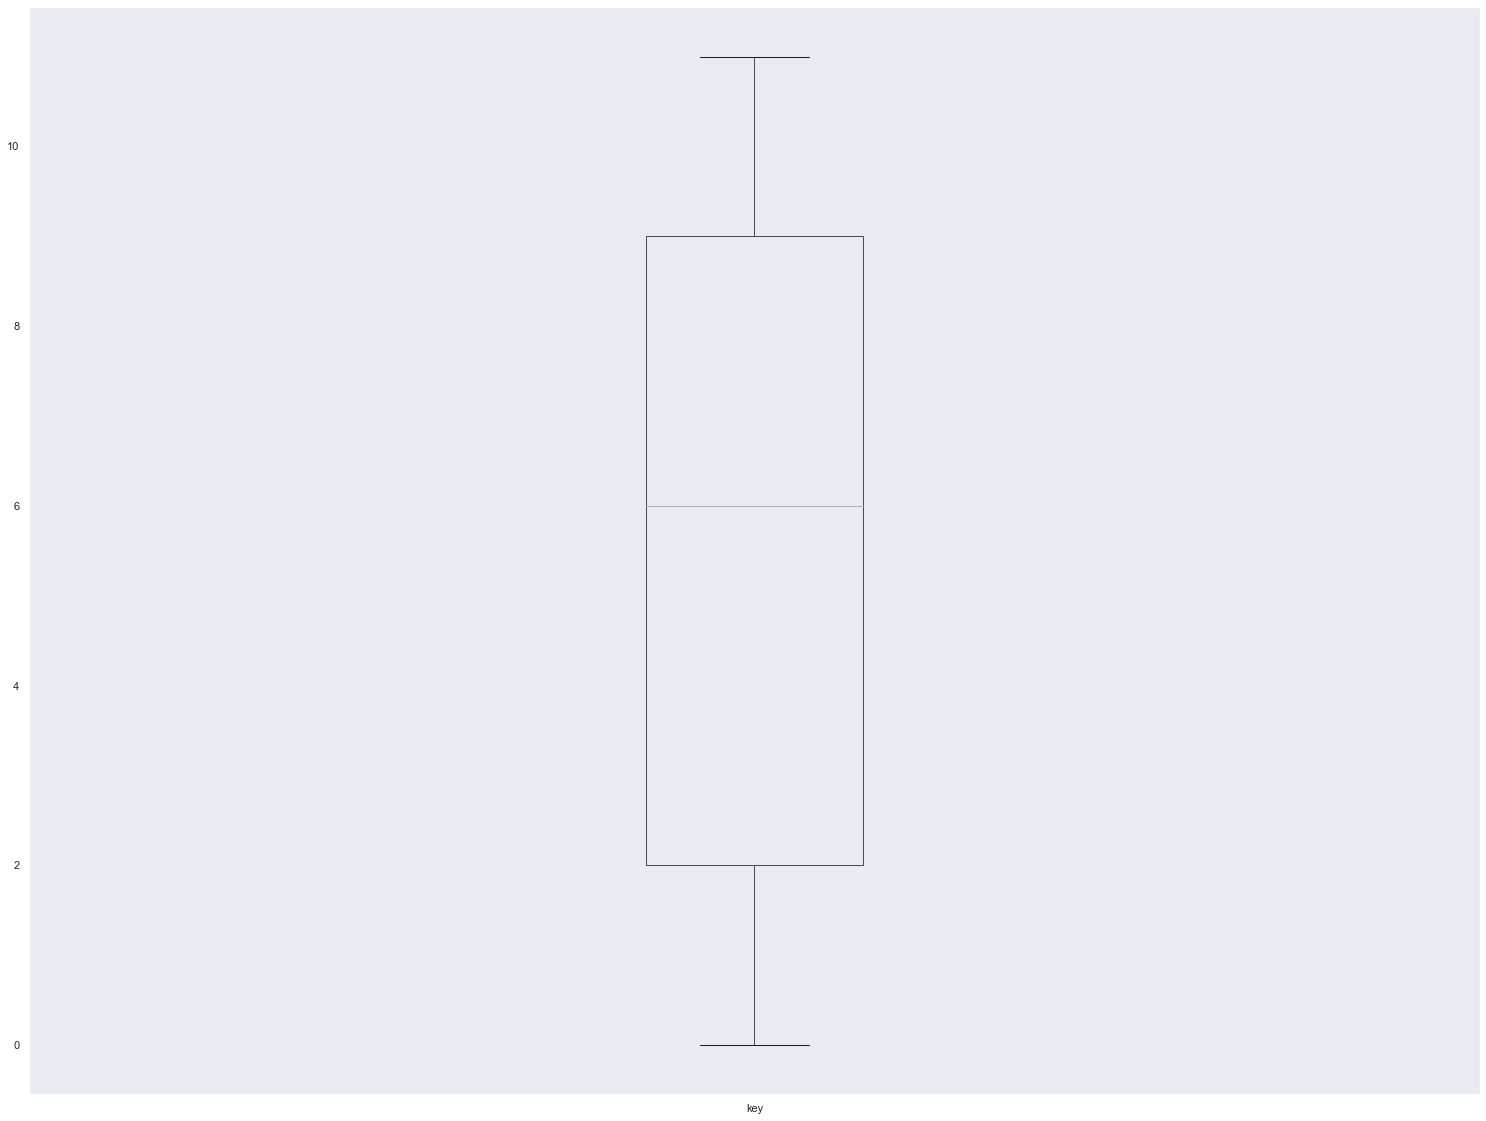

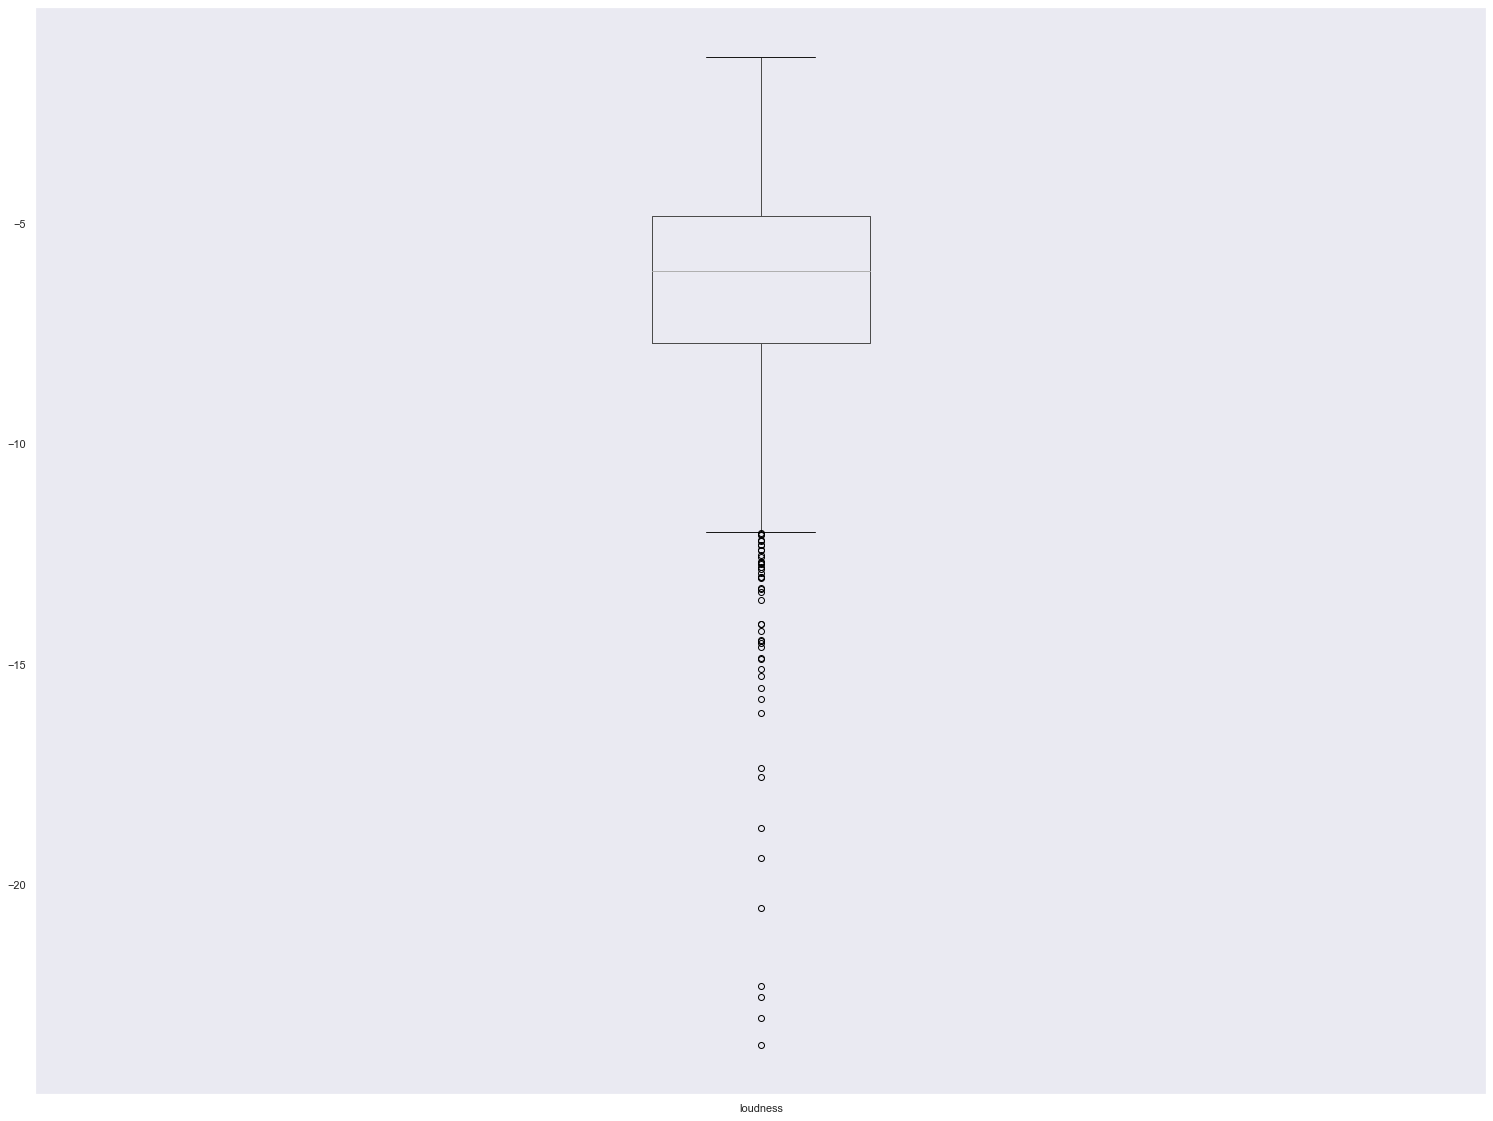

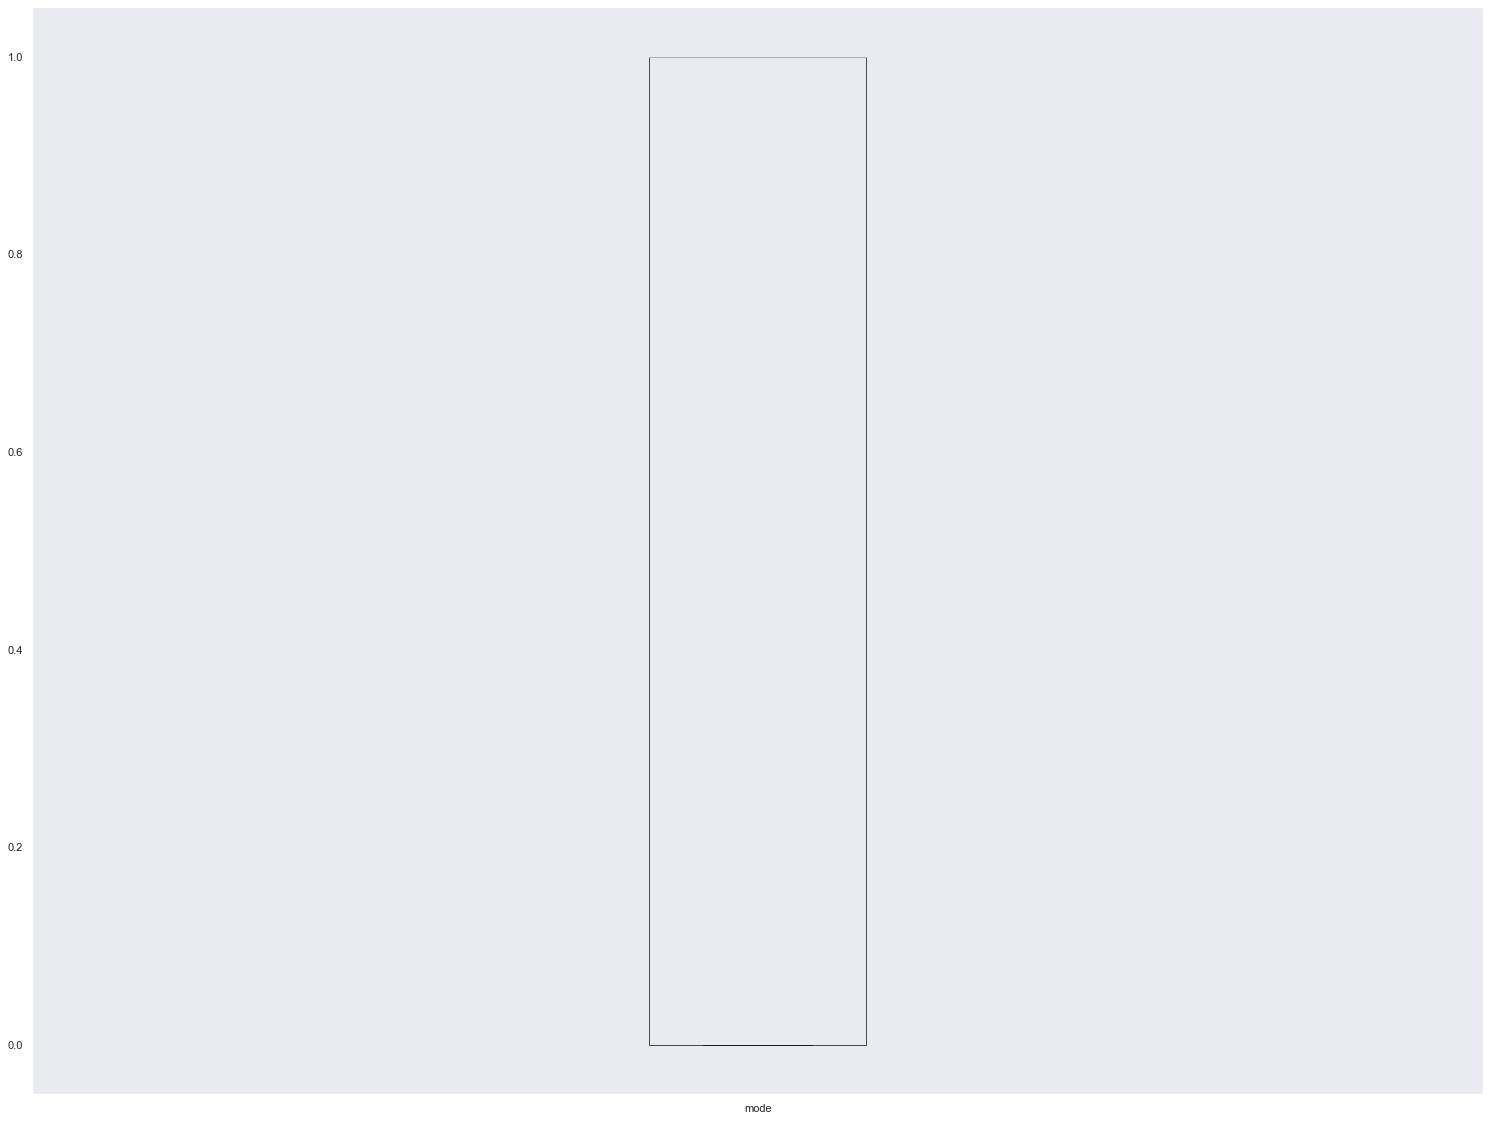

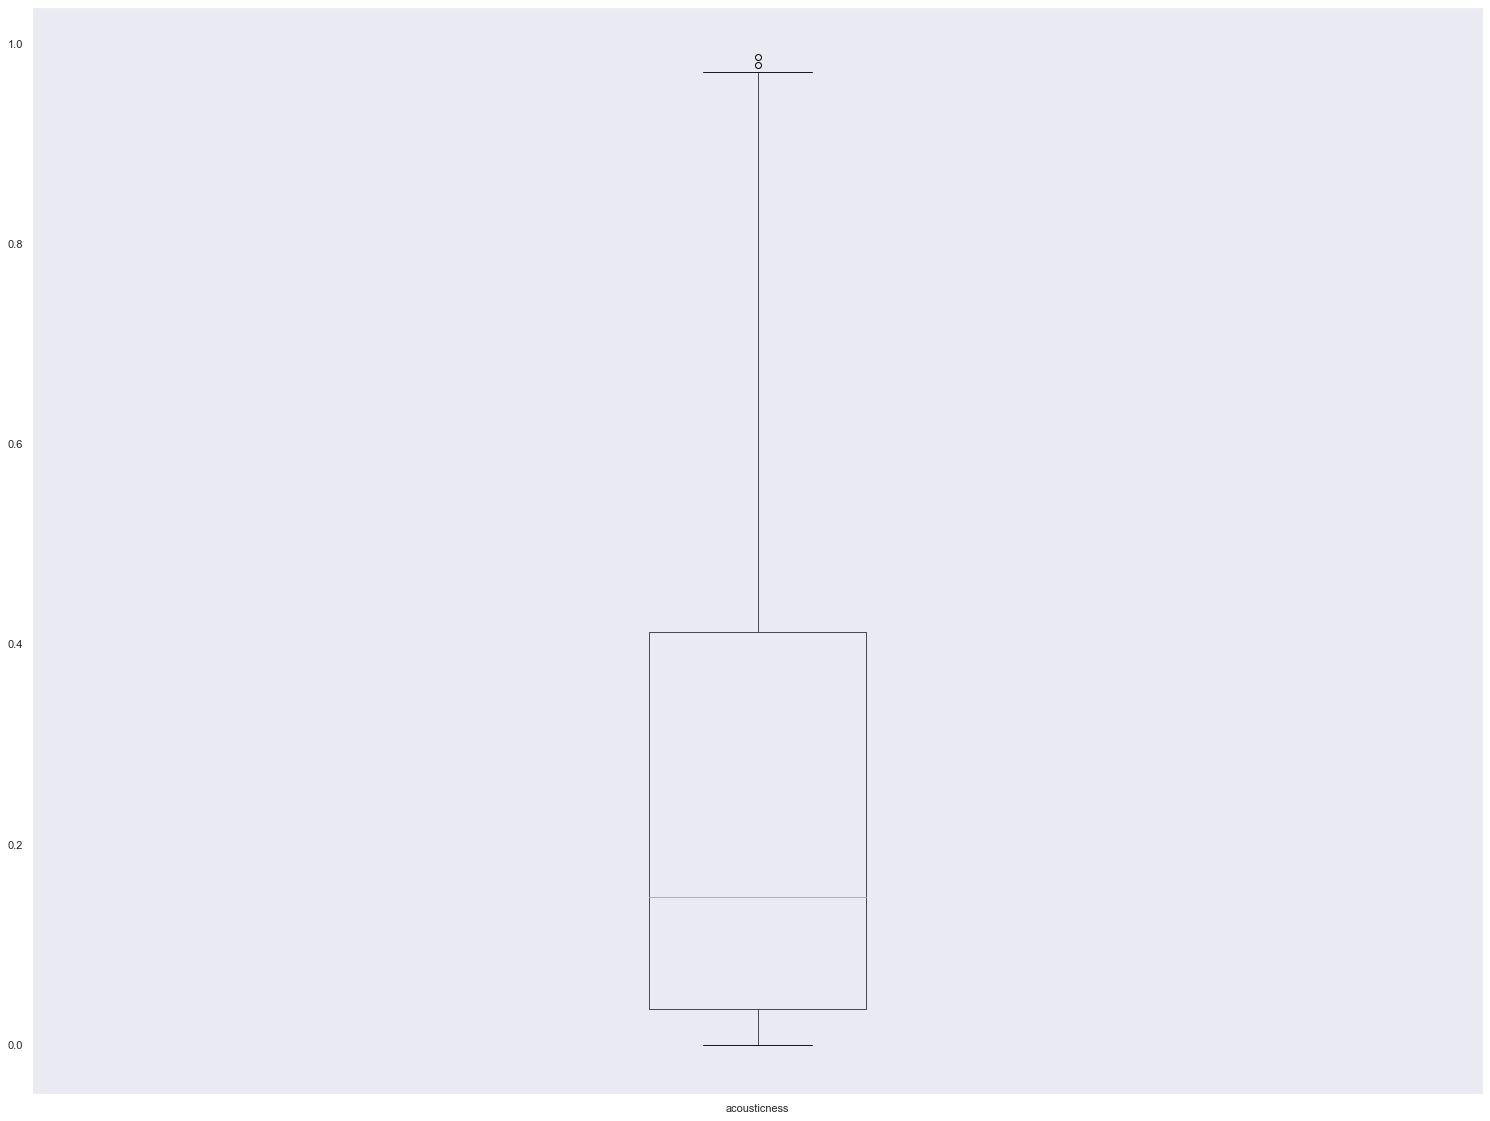

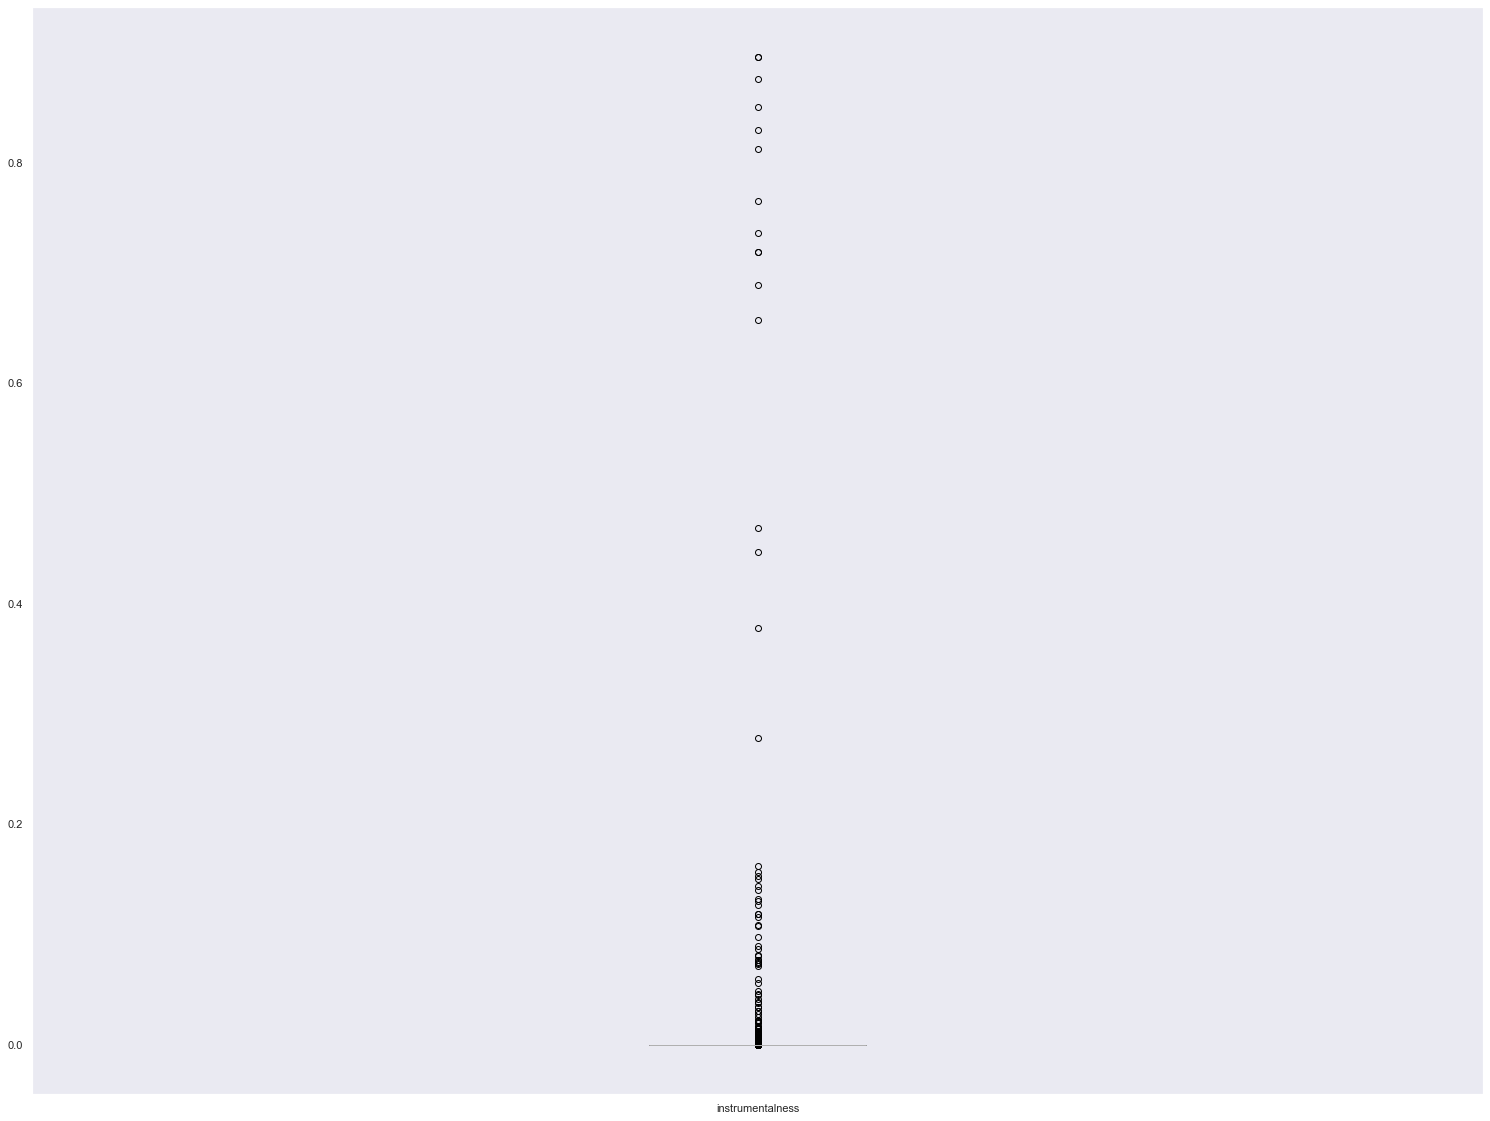

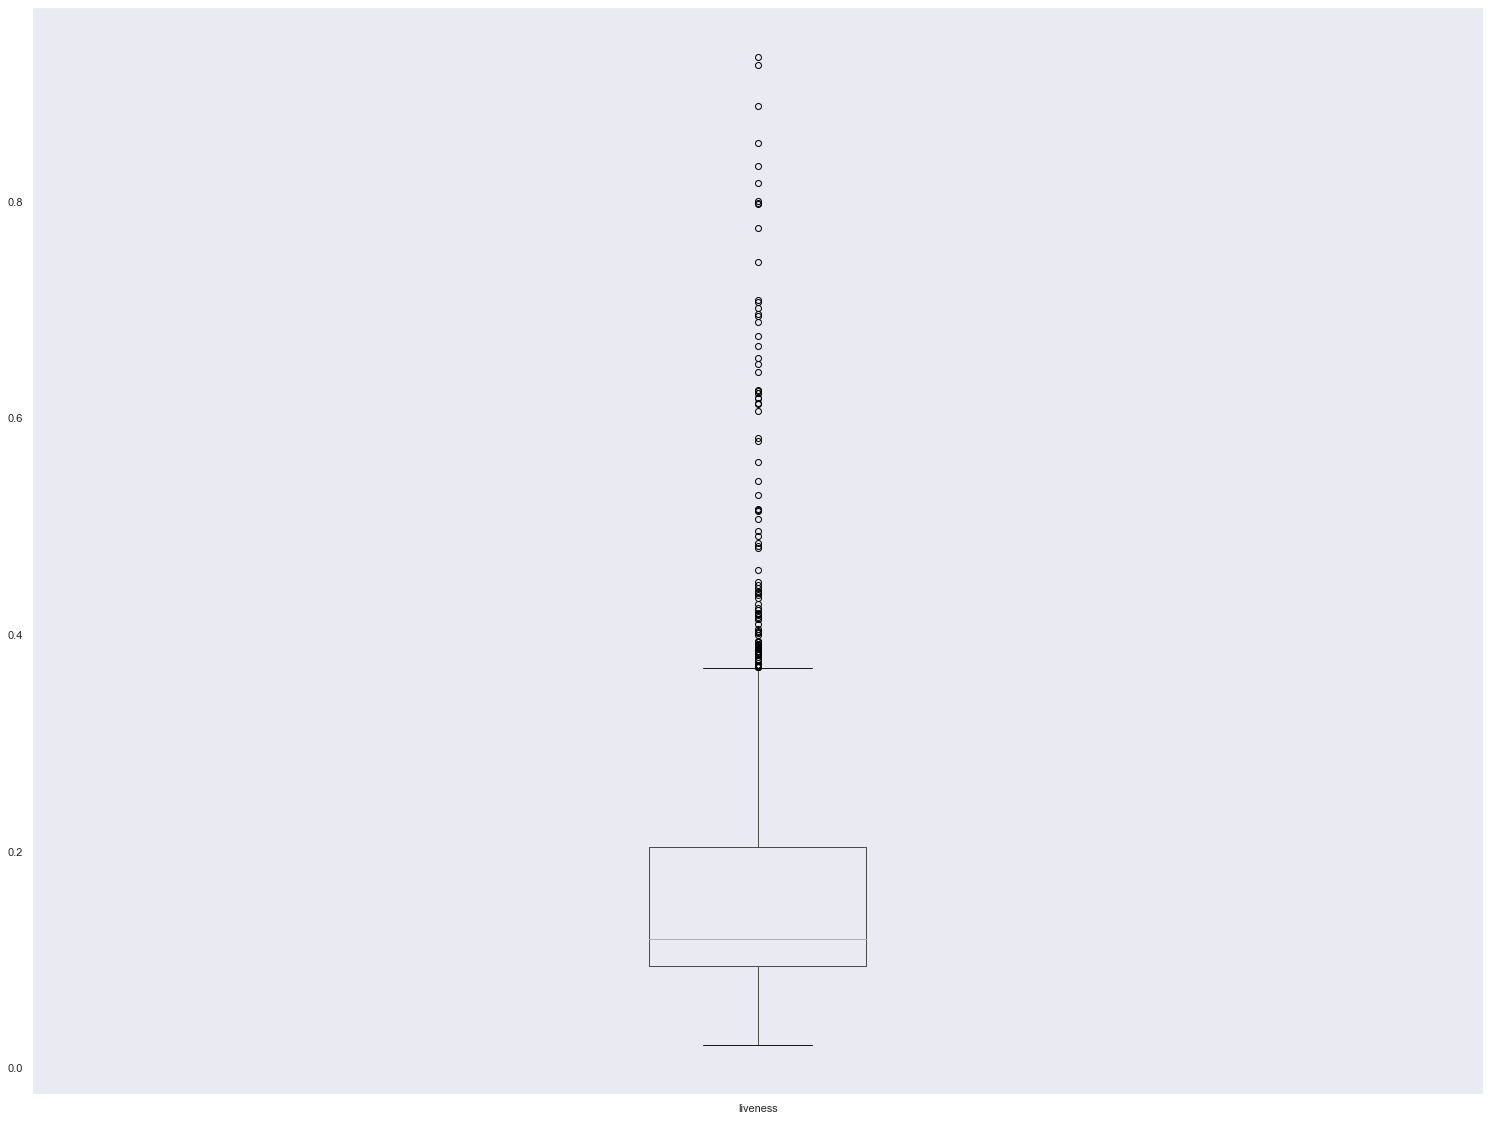

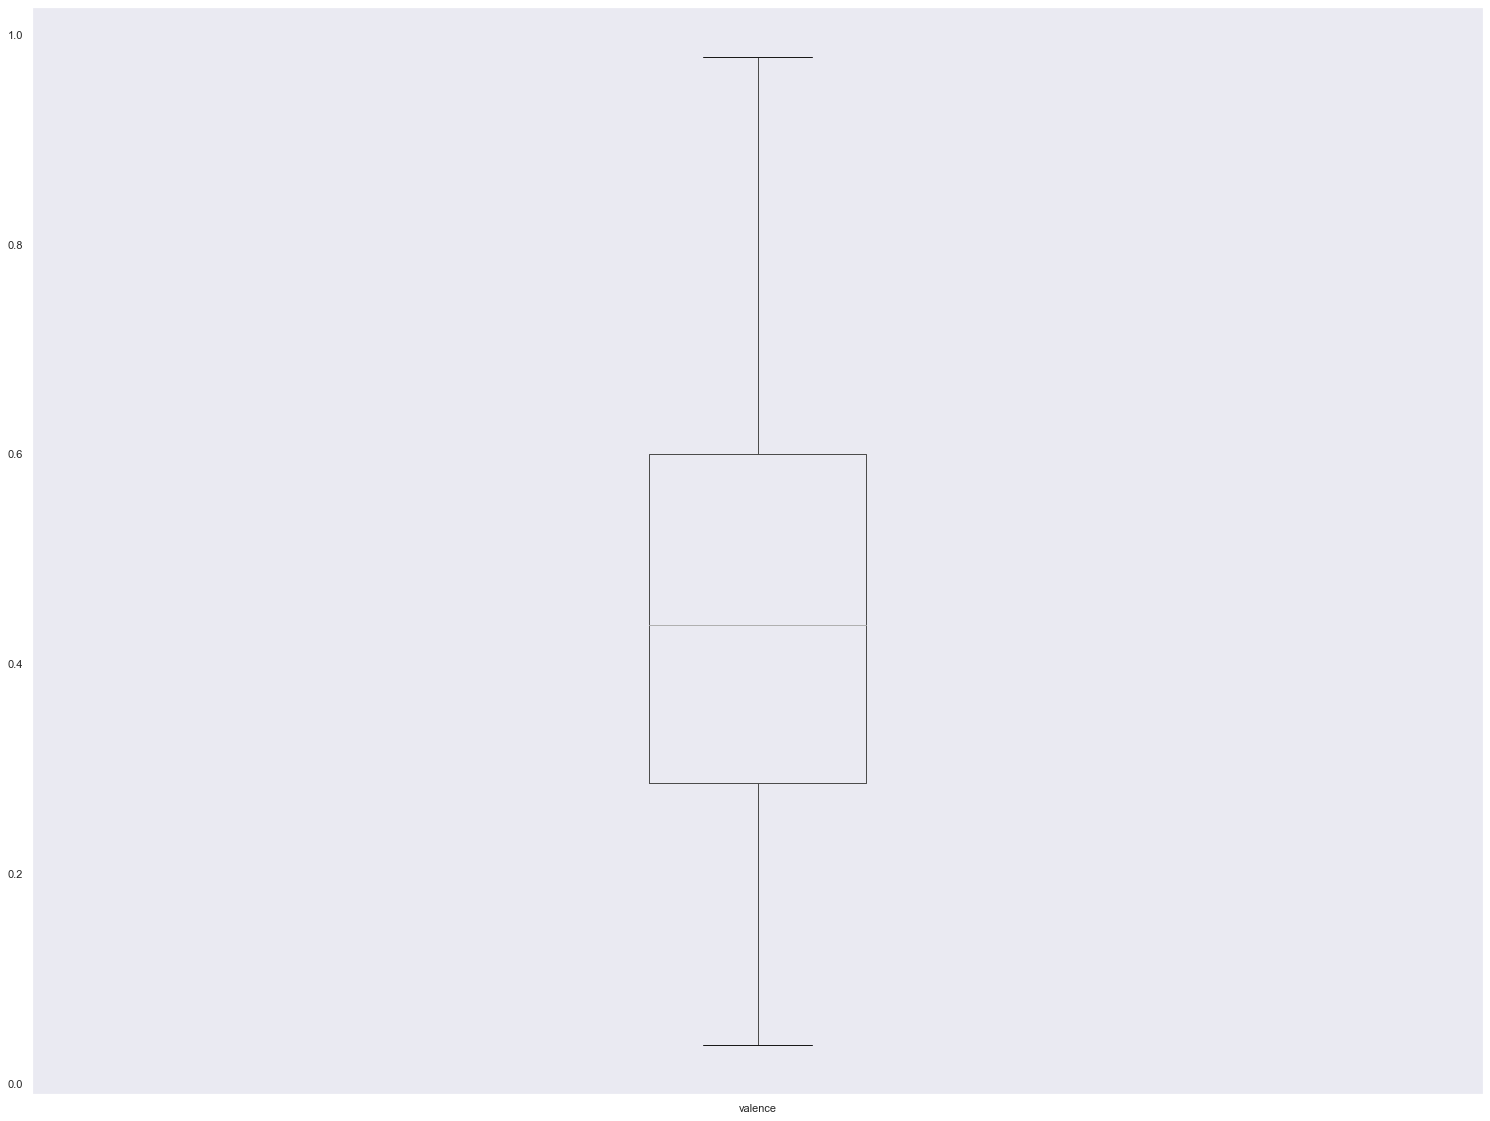

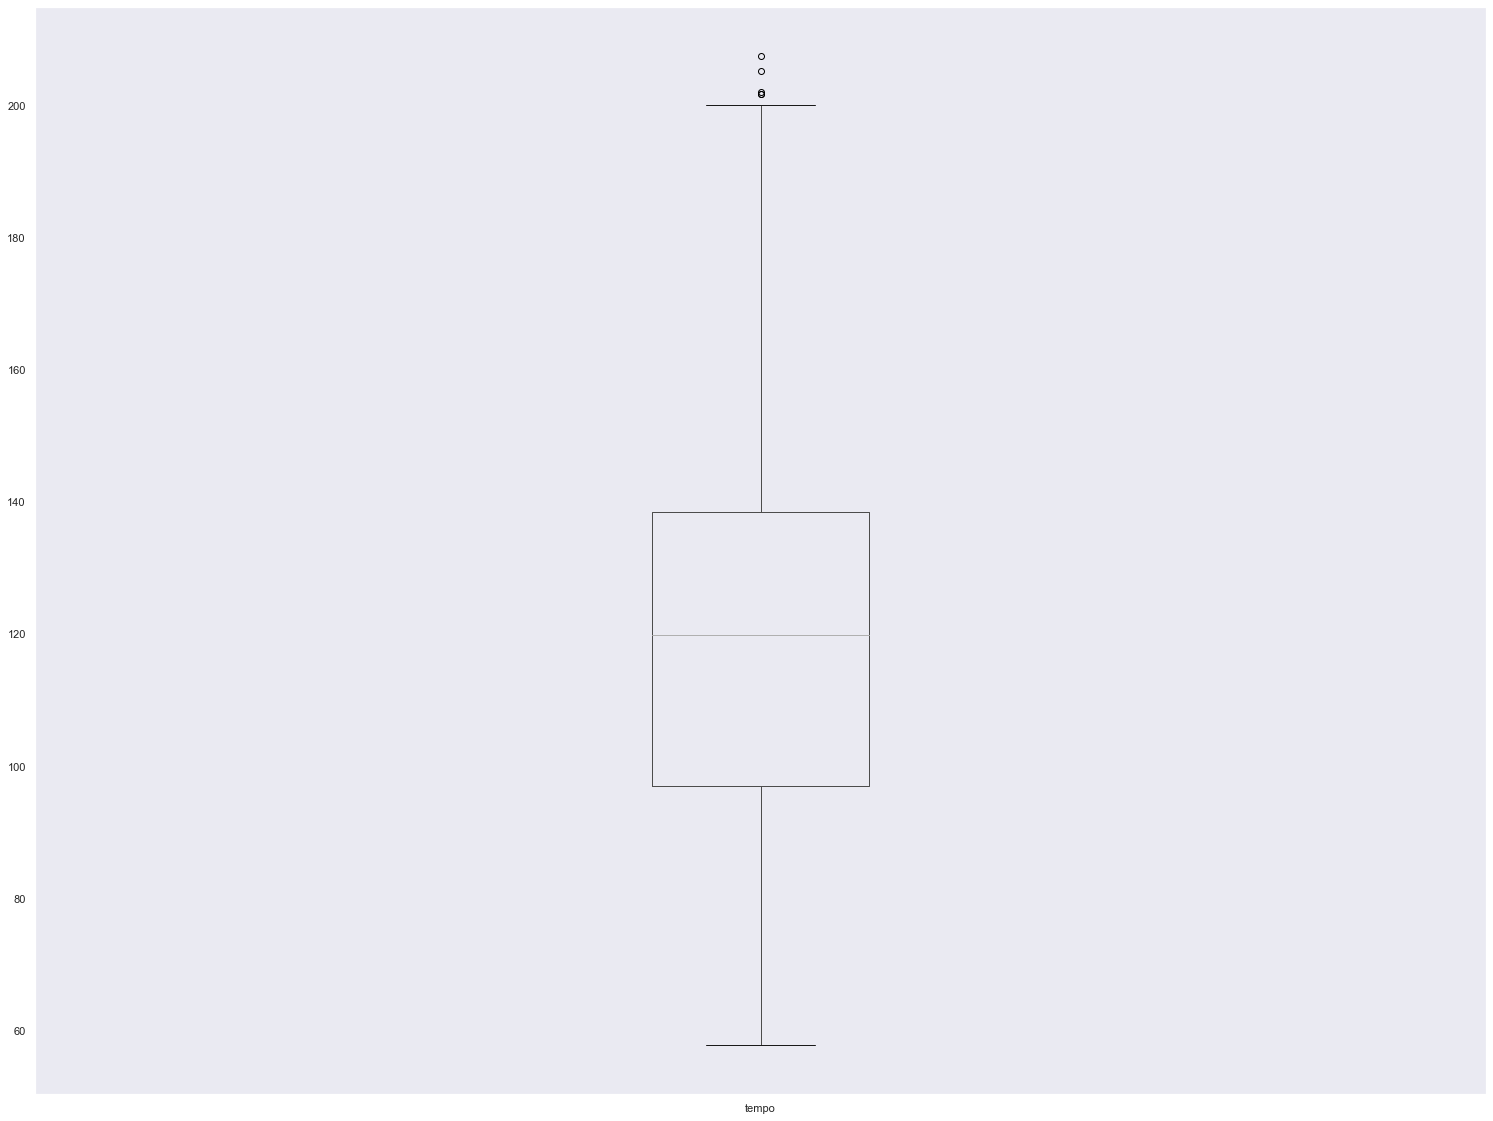

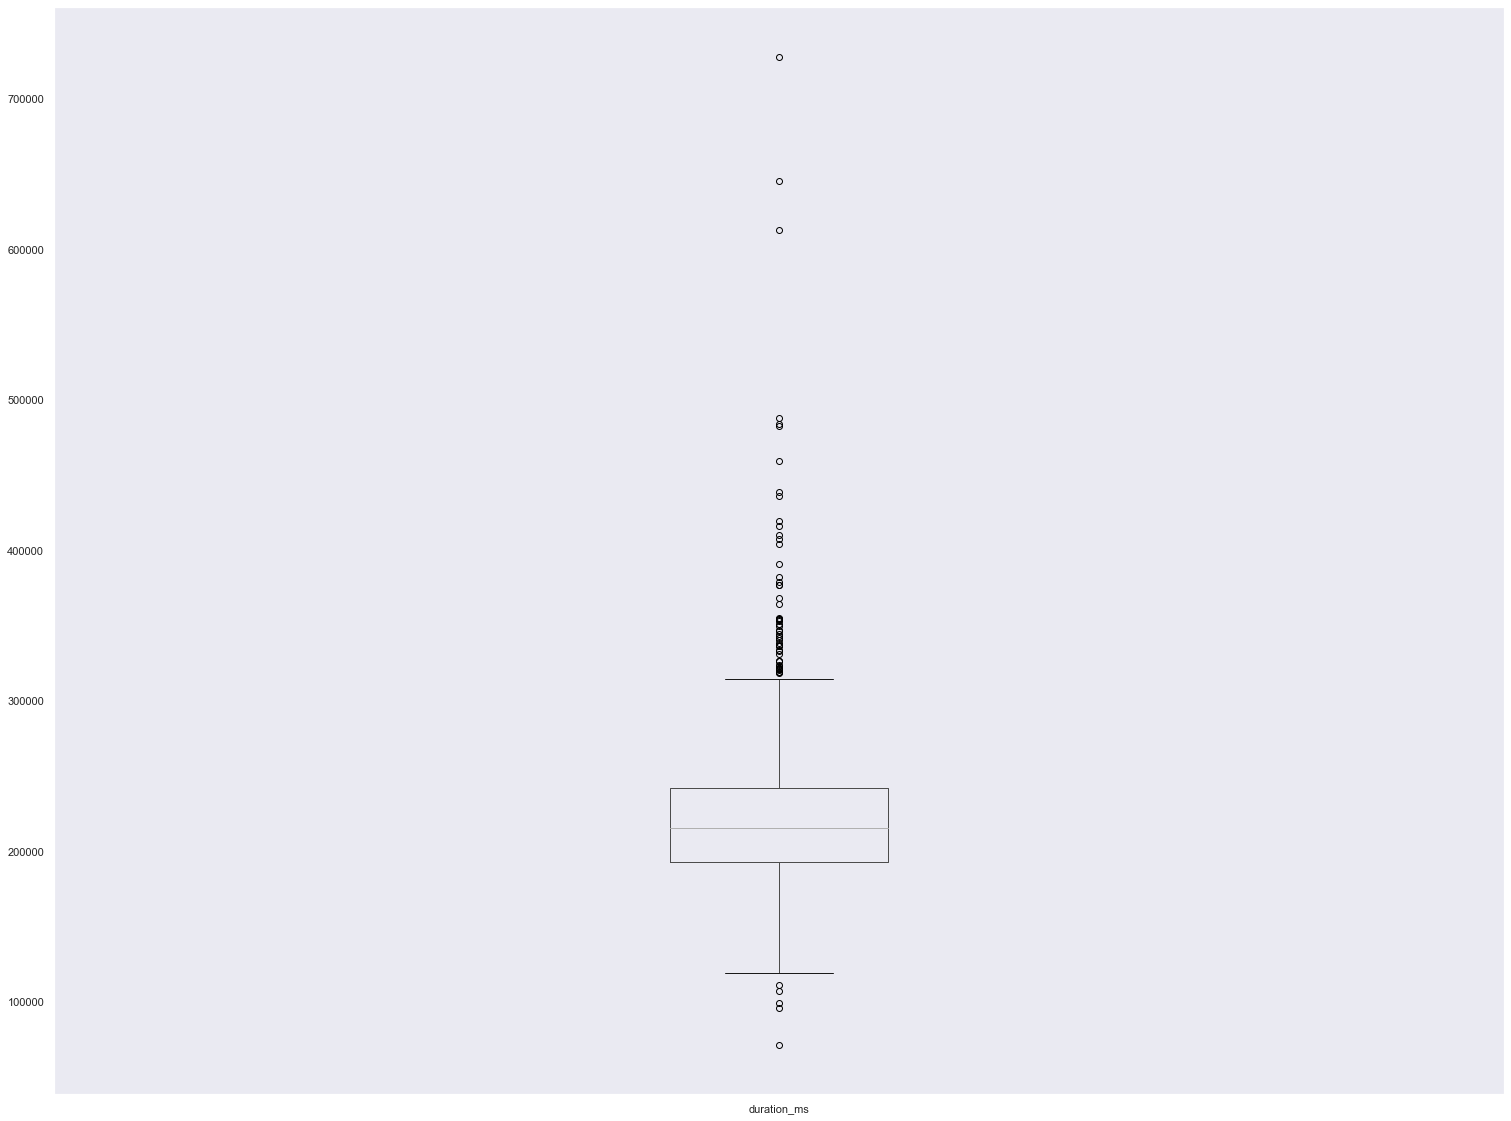

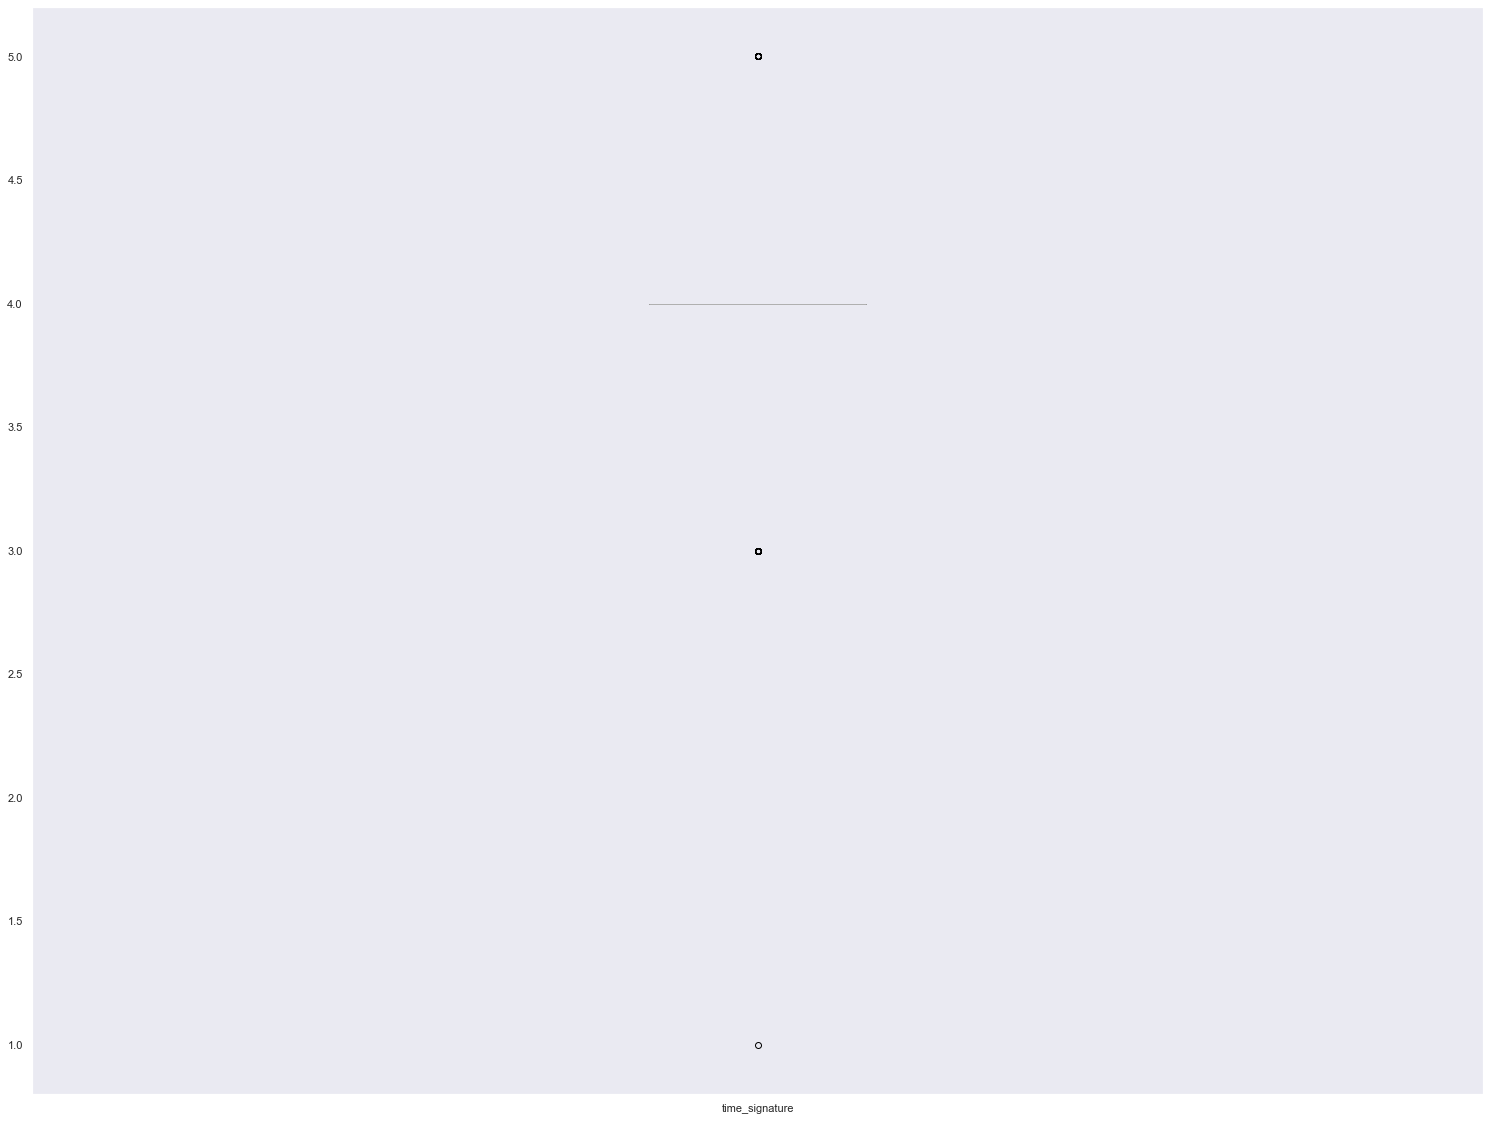

In [78]:
#Boxplot of individual features
for i in df_spotcol:
    box_plotting(df_spot,i)

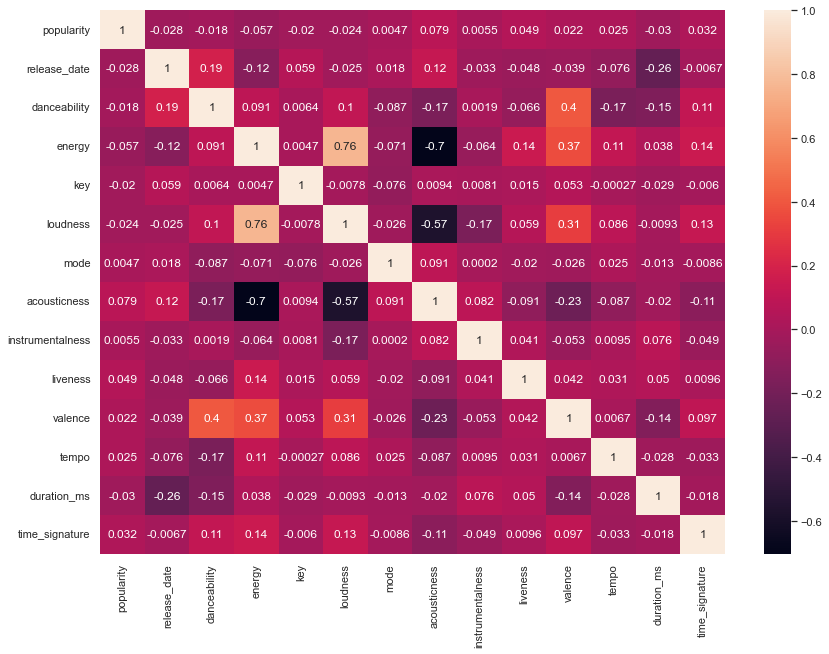

In [79]:
#Correlation matrix of the numerical data
#Energy and loudness are highly correlated and this could affect the prediction of the data
#Hence take any one of the features among these two.We are taking energy in this case
correlation_matrix = df_spot.corr()
ax = plt.subplots(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True) 
plt.show()

In [80]:
#After analyzing the histogram and correlation matrix we have selected these attributes as our main features
#And they distributed in a uniform manner and the data points are closer and dont have outliers
features=['danceability','valence','tempo','energy','acousticness','instrumentalness']
df_spot.loc[:, features].mean()

danceability          0.617052
valence               0.451187
tempo               119.730703
energy                0.634744
acousticness          0.261331
instrumentalness      0.010788
dtype: float64

In [81]:
df_spot.columns

Index(['id', 'title', 'all_artists', 'popularity', 'release_date',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature'],
      dtype='object')

In [82]:
#Creating a copy of the original dataframe
df_spot_copy=df_spot.copy()
df_spot_copy.head()

id                                              title  \
0  78f9pUmqxdrPpUeidwwagK  Levitate - From The Original Motion Picture “P...   
1  3NdDpSvN911VPGivFlV5d0  I Don’t Wanna Live Forever (Fifty Shades Darke...   
2  33koOQs551ijjVmLbmrcDc                  Yellow - Live from Spotify London   
3  5NQbUaeTEOGdD6hHcre0dZ                              679 (feat. Remy Boyz)   
4  7rklm17yoayxw45lpzv5uv  Se på mig nu (feat. Linnea Henriksson) - Singe...   

         all_artists  popularity  release_date  danceability  energy  key  \
0    Imagine Dragons           0          2016         0.310   0.681   11   
1       Taylor Swift           0          2016         0.735   0.451    0   
2           Coldplay          58          2016         0.223   0.439   11   
3          Remy Boyz          73          2015         0.618   0.717    7   
4  Linnea Henriksson          52          2016         0.622   0.729    0   

   loudness  mode  acousticness  instrumentalness  liveness  valence    tempo  \
0    -5.520     1       0.03310          0.000000     0.185   0.2330  106.784   
1    -8.374     1       0.06310          0.000013     0.325   0.0862  117.973   
2   -10.456     1       0.44700          0.014100     0.926   0.1190  165.899   
3    -5.738     1       0.00256          0.000000     0.625   0.6030  190.050   
4    -7.929     0       0.10800          0.000006     0.163   0.5320  106.053   

   duration_ms  time_signature  
0       198173               5  
1       245200               4  
2       252467               4  
3       196693               4  
4       250040               4

In [83]:
#Here we are going to scale the numerical data using Min Max Scaler
#Hence we have to remove the string attributes and the binary columns and add them back after scaling
del df_spot['id'] #String
del df_spot['title']#String
del df_spot['mode']
del df_spot['key']
del df_spot['time_signature']
del df_spot['release_date']#String
del df_spot['all_artists']#String


In [84]:
df_spot.head()

popularity  danceability  energy  loudness  acousticness  instrumentalness  \
0           0         0.310   0.681    -5.520       0.03310          0.000000   
1           0         0.735   0.451    -8.374       0.06310          0.000013   
2          58         0.223   0.439   -10.456       0.44700          0.014100   
3          73         0.618   0.717    -5.738       0.00256          0.000000   
4          52         0.622   0.729    -7.929       0.10800          0.000006   

   liveness  valence    tempo  duration_ms  
0     0.185   0.2330  106.784       198173  
1     0.325   0.0862  117.973       245200  
2     0.926   0.1190  165.899       252467  
3     0.625   0.6030  190.050       196693  
4     0.163   0.5320  106.053       250040

<h1>Normalization</h1>
<p>In the below block we are going to apply the min max scaler to transform the numerical data between the 
    range of (0,1)</p>
    <br>
 <img src="min_max.png">

In [85]:
#Min Max Scaling
dfcol=df_spot.columns
from sklearn.preprocessing import MinMaxScaler
mmsc=MinMaxScaler(feature_range=(0,1)).fit(df_spot)
df_spot = mmsc.transform(df_spot)
df_spot = pd.DataFrame(df_spot)
df_spot.columns=dfcol
df_spot.head()

popularity  danceability    energy  loudness  acousticness  \
0    0.000000      0.232477  0.680242  0.807466      0.033511   
1    0.000000      0.728972  0.440683  0.680180      0.063906   
2    0.644444      0.130841  0.428185  0.587325      0.452873   
3    0.811111      0.592290  0.717738  0.797743      0.002567   
4    0.577778      0.596963  0.730236  0.700027      0.109399   

   instrumentalness  liveness   valence     tempo  duration_ms  
0          0.000000  0.179178  0.207647  0.326997     0.192807  
1          0.000015  0.332603  0.051726  0.401782     0.264397  
2          0.015737  0.991233  0.086564  0.722109     0.275460  
3          0.000000  0.661370  0.600637  0.883528     0.190554  
4          0.000007  0.155068  0.525226  0.322111     0.271765

In [86]:
#Adding back all the string columns back to the scaled dataframe
df_spot.insert(0,'id',df_spot_copy['id'],True)
df_spot.insert(1,'title',df_spot_copy['title'],True)
df_spot.insert(2,'all_artists',df_spot_copy['all_artists'],True)
df_spot.insert(3,'release_date',df_spot_copy['release_date'],True)
df_spot.head()

id                                              title  \
0  78f9pUmqxdrPpUeidwwagK  Levitate - From The Original Motion Picture “P...   
1  3NdDpSvN911VPGivFlV5d0  I Don’t Wanna Live Forever (Fifty Shades Darke...   
2  33koOQs551ijjVmLbmrcDc                  Yellow - Live from Spotify London   
3  5NQbUaeTEOGdD6hHcre0dZ                              679 (feat. Remy Boyz)   
4  7rklm17yoayxw45lpzv5uv  Se på mig nu (feat. Linnea Henriksson) - Singe...   

         all_artists  release_date  popularity  danceability    energy  \
0    Imagine Dragons        2016.0    0.000000      0.232477  0.680242   
1       Taylor Swift        2016.0    0.000000      0.728972  0.440683   
2           Coldplay        2016.0    0.644444      0.130841  0.428185   
3          Remy Boyz        2015.0    0.811111      0.592290  0.717738   
4  Linnea Henriksson        2016.0    0.577778      0.596963  0.730236   

   loudness  acousticness  instrumentalness  liveness   valence     tempo  \
0  0.807466      0.033511          0.000000  0.179178  0.207647  0.326997   
1  0.680180      0.063906          0.000015  0.332603  0.051726  0.401782   
2  0.587325      0.452873          0.015737  0.991233  0.086564  0.722109   
3  0.797743      0.002567          0.000000  0.661370  0.600637  0.883528   
4  0.700027      0.109399          0.000007  0.155068  0.525226  0.322111   

   duration_ms  
0     0.192807  
1     0.264397  
2     0.275460  
3     0.190554  
4     0.271765

In [87]:
df_spot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                945 non-null    object 
 1   title             945 non-null    object 
 2   all_artists       945 non-null    object 
 3   release_date      945 non-null    float64
 4   popularity        1395 non-null   float64
 5   danceability      1395 non-null   float64
 6   energy            1395 non-null   float64
 7   loudness          1395 non-null   float64
 8   acousticness      1395 non-null   float64
 9   instrumentalness  1395 non-null   float64
 10  liveness          1395 non-null   float64
 11  valence           1395 non-null   float64
 12  tempo             1395 non-null   float64
 13  duration_ms       1395 non-null   float64
dtypes: float64(11), object(3)
memory usage: 152.7+ KB


In [88]:
#Adding back the binary and categorical features back to the scaled dataframe
df_spot['mode']=df_spot_copy['mode']
df_spot['key']=df_spot_copy['key']
df_spot['time_signature']=df_spot_copy['time_signature']

In [89]:
df_spot.head()

id                                              title  \
0  78f9pUmqxdrPpUeidwwagK  Levitate - From The Original Motion Picture “P...   
1  3NdDpSvN911VPGivFlV5d0  I Don’t Wanna Live Forever (Fifty Shades Darke...   
2  33koOQs551ijjVmLbmrcDc                  Yellow - Live from Spotify London   
3  5NQbUaeTEOGdD6hHcre0dZ                              679 (feat. Remy Boyz)   
4  7rklm17yoayxw45lpzv5uv  Se på mig nu (feat. Linnea Henriksson) - Singe...   

         all_artists  release_date  popularity  danceability    energy  \
0    Imagine Dragons        2016.0    0.000000      0.232477  0.680242   
1       Taylor Swift        2016.0    0.000000      0.728972  0.440683   
2           Coldplay        2016.0    0.644444      0.130841  0.428185   
3          Remy Boyz        2015.0    0.811111      0.592290  0.717738   
4  Linnea Henriksson        2016.0    0.577778      0.596963  0.730236   

   loudness  acousticness  instrumentalness  liveness   valence     tempo  \
0  0.807466      0.033511          0.000000  0.179178  0.207647  0.326997   
1  0.680180      0.063906          0.000015  0.332603  0.051726  0.401782   
2  0.587325      0.452873          0.015737  0.991233  0.086564  0.722109   
3  0.797743      0.002567          0.000000  0.661370  0.600637  0.883528   
4  0.700027      0.109399          0.000007  0.155068  0.525226  0.322111   

   duration_ms  mode   key  time_signature  
0     0.192807   1.0  11.0             5.0  
1     0.264397   1.0   0.0             4.0  
2     0.275460   1.0  11.0             4.0  
3     0.190554   1.0   7.0             4.0  
4     0.271765   0.0   0.0             4.0

In [90]:
#Checking for null values again
df_spot.isnull().sum()

id                  450
title               450
all_artists         450
release_date        450
popularity            0
danceability          0
energy                0
loudness              0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_ms           0
mode                450
key                 450
time_signature      450
dtype: int64

In [91]:
#again dropping null values
df_spot=df_spot.dropna()

In [92]:
df_spot.head()

id                                              title  \
0  78f9pUmqxdrPpUeidwwagK  Levitate - From The Original Motion Picture “P...   
1  3NdDpSvN911VPGivFlV5d0  I Don’t Wanna Live Forever (Fifty Shades Darke...   
2  33koOQs551ijjVmLbmrcDc                  Yellow - Live from Spotify London   
3  5NQbUaeTEOGdD6hHcre0dZ                              679 (feat. Remy Boyz)   
4  7rklm17yoayxw45lpzv5uv  Se på mig nu (feat. Linnea Henriksson) - Singe...   

         all_artists  release_date  popularity  danceability    energy  \
0    Imagine Dragons        2016.0    0.000000      0.232477  0.680242   
1       Taylor Swift        2016.0    0.000000      0.728972  0.440683   
2           Coldplay        2016.0    0.644444      0.130841  0.428185   
3          Remy Boyz        2015.0    0.811111      0.592290  0.717738   
4  Linnea Henriksson        2016.0    0.577778      0.596963  0.730236   

   loudness  acousticness  instrumentalness  liveness   valence     tempo  \
0  0.807466      0.033511          0.000000  0.179178  0.207647  0.326997   
1  0.680180      0.063906          0.000015  0.332603  0.051726  0.401782   
2  0.587325      0.452873          0.015737  0.991233  0.086564  0.722109   
3  0.797743      0.002567          0.000000  0.661370  0.600637  0.883528   
4  0.700027      0.109399          0.000007  0.155068  0.525226  0.322111   

   duration_ms  mode   key  time_signature  
0     0.192807   1.0  11.0             5.0  
1     0.264397   1.0   0.0             4.0  
2     0.275460   1.0  11.0             4.0  
3     0.190554   1.0   7.0             4.0  
4     0.271765   0.0   0.0             4.0

In [93]:
df_spot.isnull().sum()

id                  0
title               0
all_artists         0
release_date        0
popularity          0
danceability        0
energy              0
loudness            0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
mode                0
key                 0
time_signature      0
dtype: int64

<h2>KMEANS CLUSTERING</h2>
<img src="Kmeans.png">
<br>
<p>It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.
    <br>
    With elbow method we will determine the optimum K value and then we will cluster the data using Kmeans and 
    the particular k value by calculating the distances between the data points and the centroid
 </p>
 <img src="elbow.png">

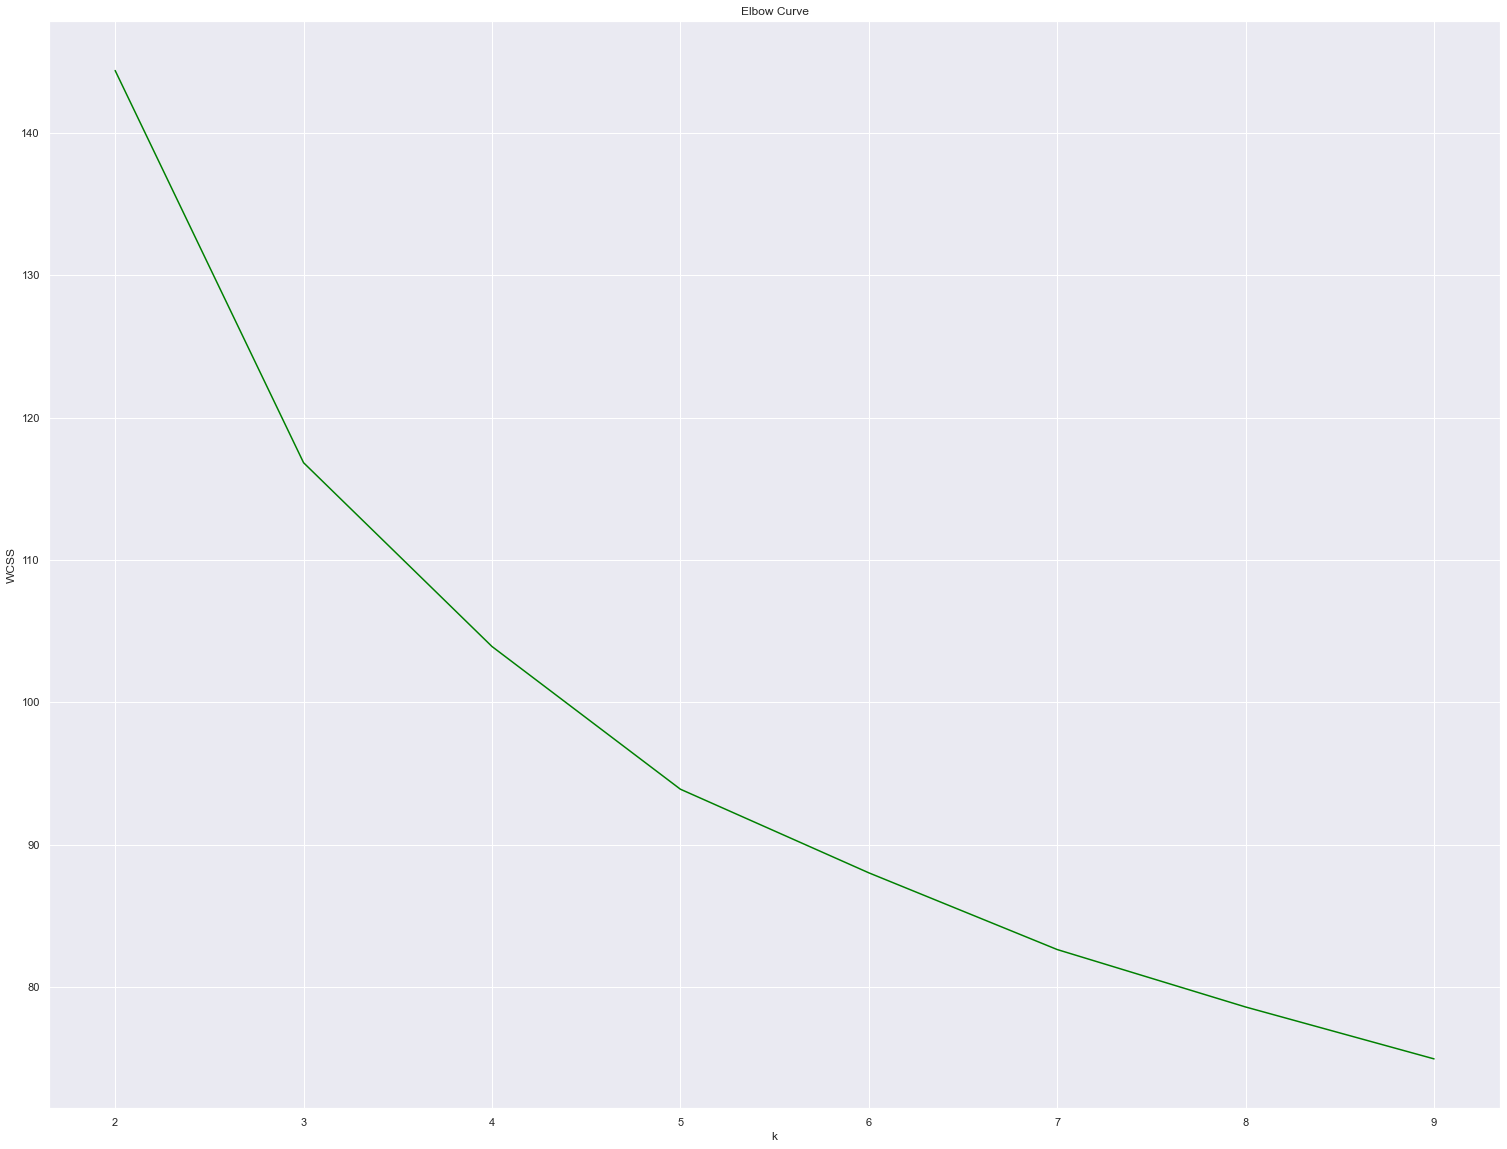

In [94]:
#Kmeans Clustering
from sklearn.cluster import KMeans
X = df_spot[features]
distorsions = []
#Plotting for each cluster between (2,10)
for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(X)
    distorsions.append(model.inertia_)
plt.plot(range(2,10), distorsions, color='green')
plt.grid(True)
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Elbow Curve')
plt.show()

In [95]:
#Optimal k value=5.from this point the curve decreases in a linear fashion

X = df_spot[features]
model = KMeans(n_clusters=5)
model.fit(X)
y = model.predict(X) 
y

array([3, 3, 1, 2, 0, 0, 0, 4, 3, 0, 3, 0, 3, 4, 3, 3, 3, 3, 1, 0, 2, 0,
       3, 4, 2, 3, 0, 3, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 0, 4, 2, 2, 4, 3,
       3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 2, 0, 3, 3, 3, 2, 1, 4, 0, 0, 0, 3,
       0, 3, 2, 0, 0, 0, 1, 2, 3, 0, 0, 3, 4, 2, 2, 0, 4, 3, 3, 0, 0, 2,
       0, 3, 3, 0, 3, 3, 2, 3, 4, 3, 0, 3, 2, 4, 3, 0, 3, 4, 3, 4, 0, 0,
       0, 4, 0, 4, 2, 3, 0, 0, 0, 3, 3, 3, 3, 0, 2, 3, 3, 2, 2, 0, 2, 3,
       1, 2, 0, 2, 0, 4, 3, 2, 1, 3, 4, 3, 1, 0, 0, 2, 0, 0, 3, 0, 4, 0,
       0, 0, 0, 4, 4, 4, 0, 0, 2, 3, 4, 0, 2, 3, 4, 3, 2, 1, 0, 2, 0, 0,
       2, 3, 3, 3, 0, 3, 0, 3, 0, 0, 0, 4, 4, 0, 4, 0, 0, 0, 3, 0, 4, 0,
       4, 0, 0, 3, 3, 2, 4, 3, 2, 3, 0, 0, 0, 0, 4, 3, 0, 0, 2, 3, 3, 1,
       2, 0, 3, 1, 3, 3, 1, 4, 3, 3, 3, 4, 3, 0, 0, 2, 0, 4, 0, 3, 2, 4,
       0, 0, 1, 3, 2, 3, 0, 0, 3, 2, 0, 3, 4, 3, 0, 3, 2, 3, 2, 4, 3, 2,
       4, 0, 2, 3, 0, 1, 4, 2, 3, 4, 0, 2, 2, 2, 3, 3, 4, 4, 3, 1, 0, 3,
       0, 3, 3, 2, 0, 0, 0, 4, 1, 3, 3, 0, 3, 1, 0,

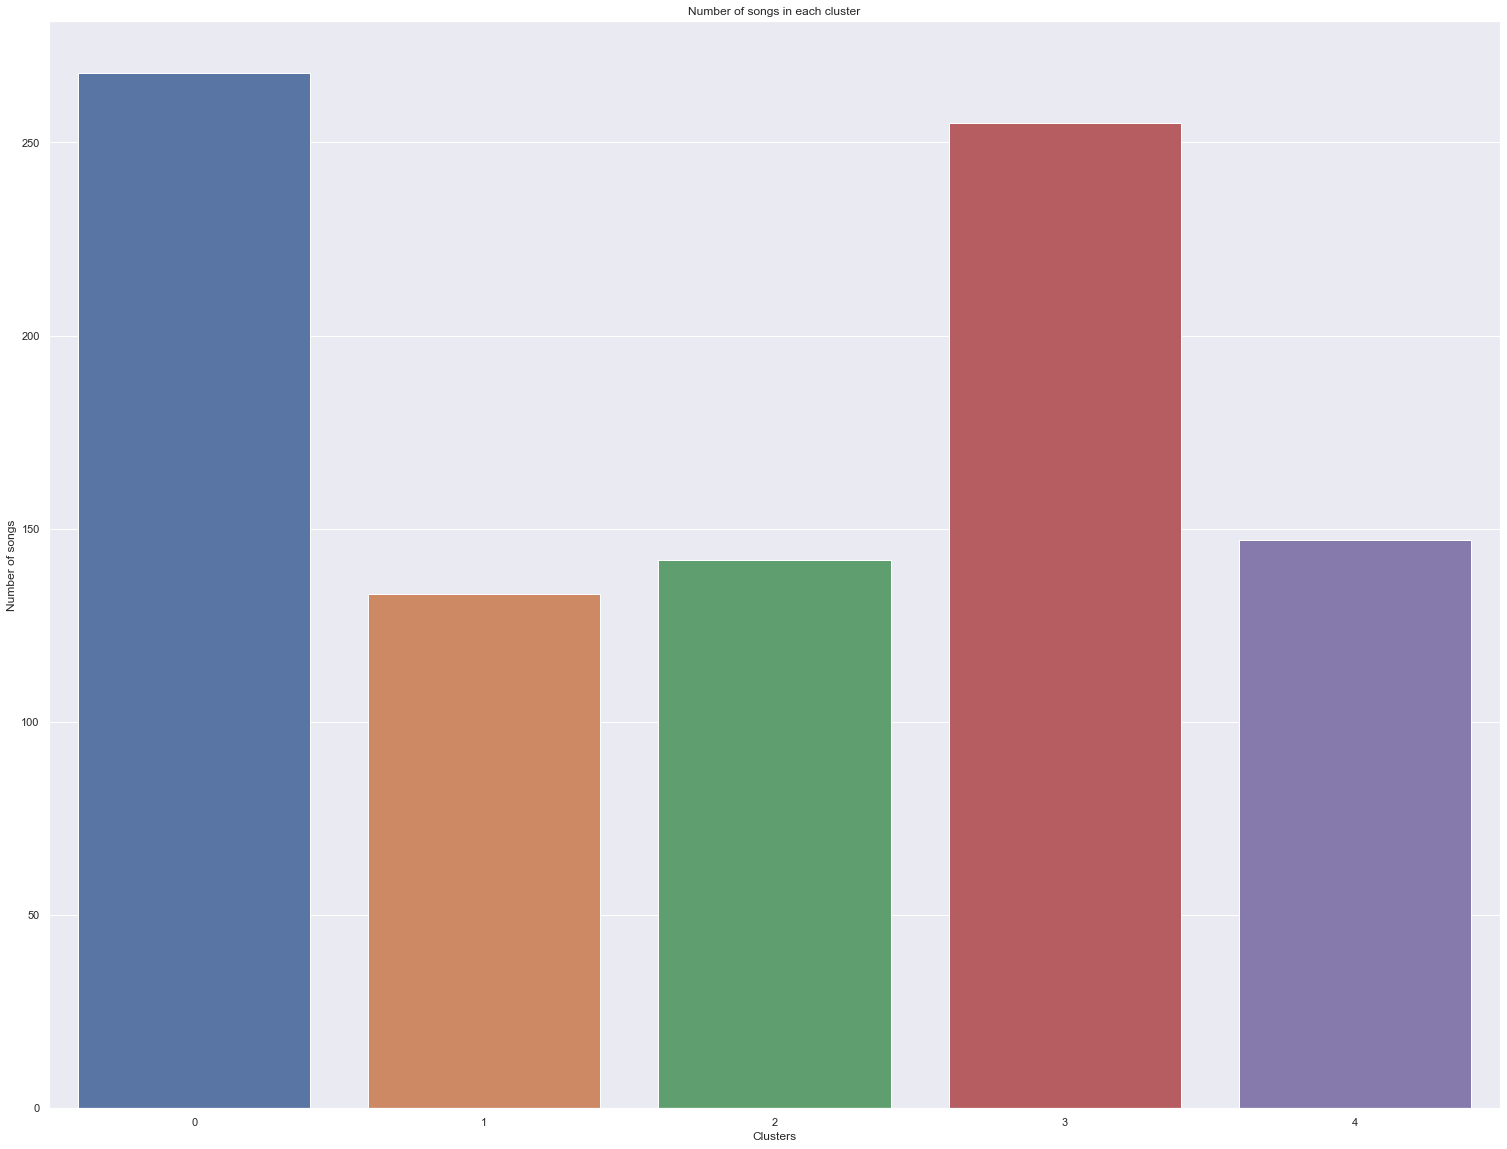

In [96]:
#Plotting the number of songs in each cluster after applying KMeans
sns.countplot(y)
plt.xlabel('Clusters')
plt.ylabel('Number of songs')
plt.title('Number of songs in each cluster')
plt.show()

In [97]:
#Coordinates of the Centroids
centers = model.cluster_centers_
centers

array([[0.67838959, 0.68228296, 0.37406497, 0.75264548, 0.11078503,
        0.01053805],
       [0.4852347 , 0.26513602, 0.38140627, 0.32051799, 0.79455698,
        0.02252799],
       [0.49617448, 0.40719409, 0.68492472, 0.7274345 , 0.09963166,
        0.00473972],
       [0.57678211, 0.27736341, 0.32012601, 0.66325812, 0.10700372,
        0.01038735],
       [0.67742705, 0.46196004, 0.36295192, 0.56160321, 0.4847992 ,
        0.01319735]])

<h2>Principal Component Analysis (PCA)</h2>
<br>
<p>Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reduce the number of features while preserving information</p>

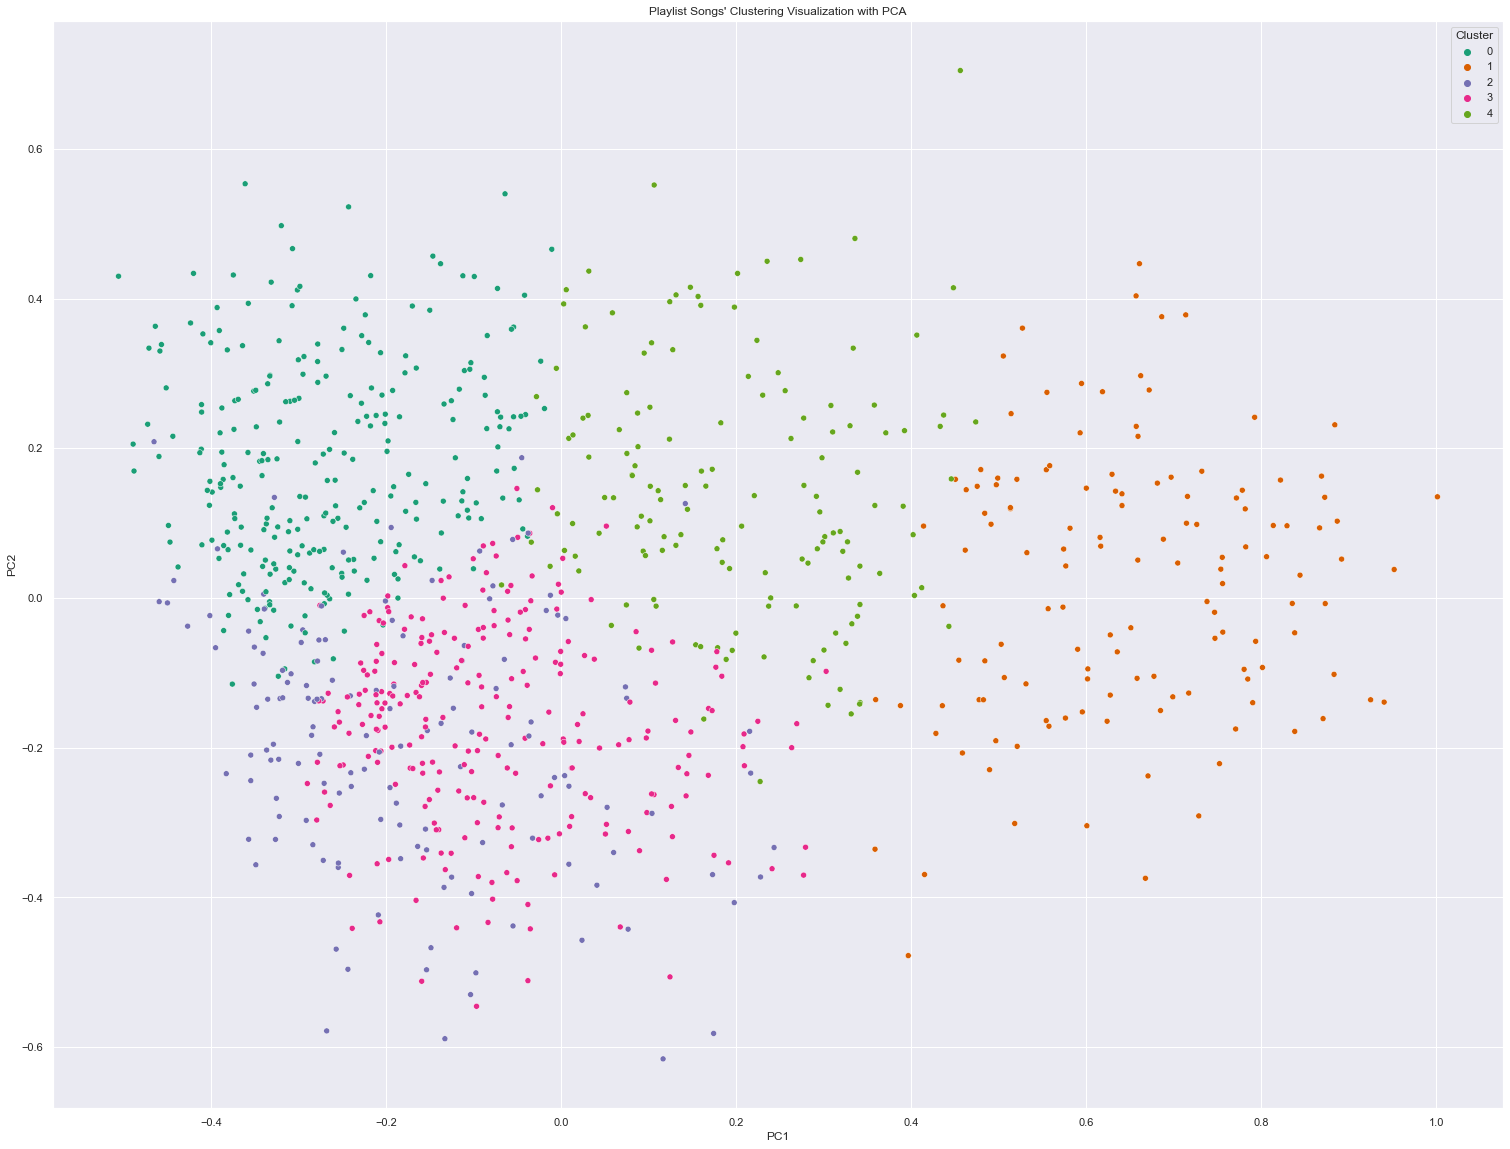

In [98]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #Reducing to 2 dimensions
#Fiting the PCA model with X and applying the dimensionality reduction on X
pc = pca.fit_transform(X)

#Creating a data frame to store the results from Dimensionality Reduction(2D data)
pca_df = pd.DataFrame(pc, columns=['PC1', 'PC2']) 
pca_df['Cluster'] = y
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Dark2')
plt.title("Playlist Songs' Clustering Visualization with PCA")
plt.show()

In [99]:
#Appending the Predicted Clusters to the dataframe
df_spot.loc[:, 'Cluster'] = y
df_spot.head(10)

id                                              title  \
0  78f9pUmqxdrPpUeidwwagK  Levitate - From The Original Motion Picture “P...   
1  3NdDpSvN911VPGivFlV5d0  I Don’t Wanna Live Forever (Fifty Shades Darke...   
2  33koOQs551ijjVmLbmrcDc                  Yellow - Live from Spotify London   
3  5NQbUaeTEOGdD6hHcre0dZ                              679 (feat. Remy Boyz)   
4  7rklm17yoayxw45lpzv5uv  Se på mig nu (feat. Linnea Henriksson) - Singe...   
5  6Fu4uPJmXn1mLkMpG2GTZJ                                    Snacket på stan   
6  1WniHvhq9zTkny0WvGXX8o                                           Chantaje   
7  4wFHfY9IILHLNwakPuFogD                                  Hasta el Amanecer   
8  6H2TKJ9KJfcq6MRmw2cF20                   Bad Things - With Camila Cabello   
9  5knuzwU65gJK7IF5yJsuaW            Rockabye (feat. Sean Paul & Anne-Marie)   

         all_artists  release_date  popularity  danceability    energy  \
0    Imagine Dragons        2016.0    0.000000      0.232477  0.680242   
1       Taylor Swift        2016.0    0.000000      0.728972  0.440683   
2           Coldplay        2016.0    0.644444      0.130841  0.428185   
3          Remy Boyz        2015.0    0.811111      0.592290  0.717738   
4  Linnea Henriksson        2016.0    0.577778      0.596963  0.730236   
5      Danny Saucedo        2016.0    0.000000      0.713785  0.832309   
6             Maluma        2016.0    0.000000      0.873832  0.758359   
7          Nicky Jam        2016.0    0.000000      0.848131  0.604208   
8     Camila Cabello        2016.0    0.000000      0.675234  0.691699   
9         Anne-Marie        2016.0    0.822222      0.711449  0.765649   

   loudness  acousticness  instrumentalness  liveness   valence     tempo  \
0  0.807466      0.033511          0.000000  0.179178  0.207647  0.326997   
1  0.680180      0.063906          0.000015  0.332603  0.051726  0.401782   
2  0.587325      0.452873          0.015737  0.991233  0.086564  0.722109   
3  0.797743      0.002567          0.000000  0.661370  0.600637  0.883528   
4  0.700027      0.109399          0.000007  0.155068  0.525226  0.322111   
5  0.844082      0.011321          0.000000  0.039781  0.680297  0.355163   
6  0.903800      0.170191          0.000052  0.155068  0.926713  0.295242   
7  0.784007      0.286709          0.000000  0.070137  0.578332  0.241552   
8  0.841540      0.231996          0.000000  0.178082  0.262878  0.534515   
9  0.872224      0.411332          0.000000  0.173699  0.748274  0.294788   

   duration_ms  mode   key  time_signature  Cluster  
0     0.192807   1.0  11.0             5.0        3  
1     0.264397   1.0   0.0             4.0        3  
2     0.275460   1.0  11.0             4.0        1  
3     0.190554   1.0   7.0             4.0        2  
4     0.271765   0.0   0.0             4.0        0  
5     0.153146   1.0   7.0             4.0        0  
6     0.188910   0.0   8.0             4.0        0  
7     0.191346   0.0   6.0             4.0        4  
8     0.255385   1.0   2.0             4.0        3  
9     0.273361   0.0   9.0             4.0        0

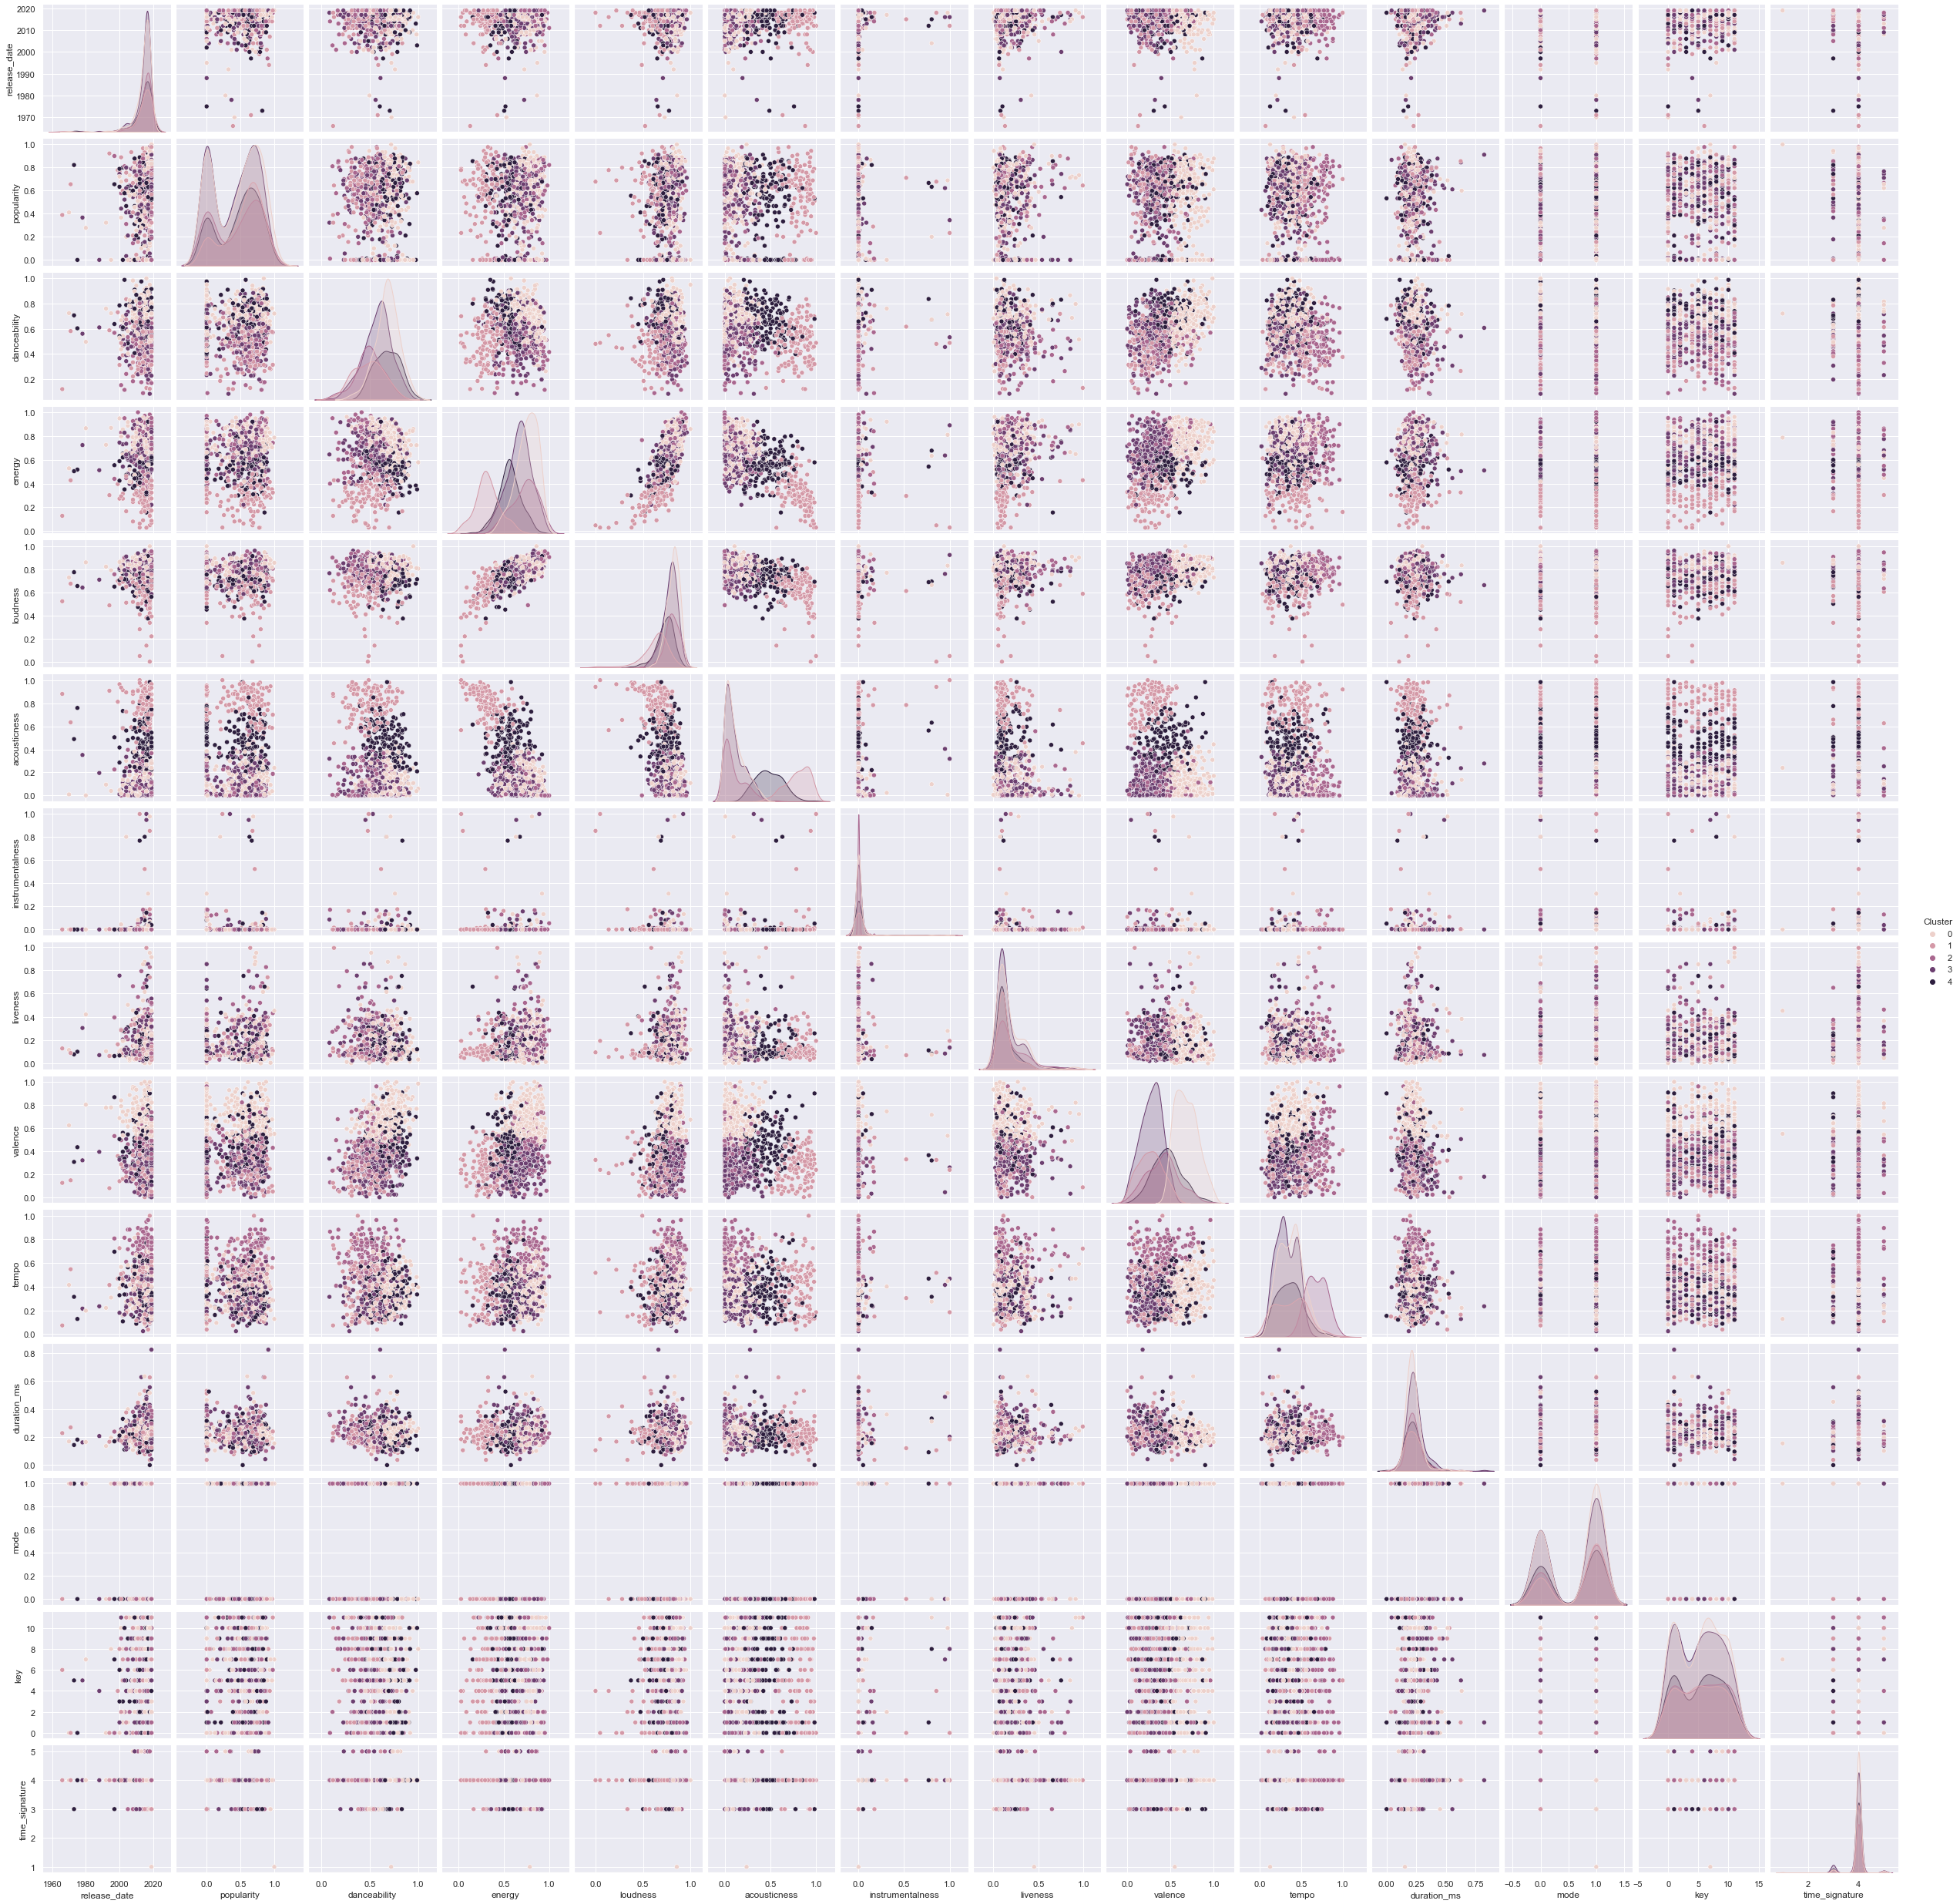

In [100]:
#Pairplot Distribution
sns.pairplot(df_spot,hue='Cluster')
plt.show()

<h1>Clustering the songs based on the target column</h2>

In [101]:
#Creating 4 arrays to store the songs in each cluster
cl0= []
cl1 = []
cl2 = []
cl3 = []
cl4 = []
#looping through and checking the cluster column of the dataframe and appending the title track to the respective cluster
for cluster,v in enumerate(df_spot['title']):
    if y[cluster] == 0:
        cl0.append(v)
    elif y[cluster] == 1:
        cl1.append(v)
    elif y[cluster] == 2:
        cl2.append(v)
    elif y[cluster] == 3:
        cl3.append(v)
    else:
        cl4.append(v)
        

In [102]:
#Function to print the cluster statistics
def print_cluster_stats(clust,i):
    clus=np.array(clust)
    print(clus[:,None])
    print("Cluster {} size: ".format(i),clus.shape)
    #Calculating the cluster mean
    #Explanation- We iterate through all rows having the feature columns and compute the mean of those rows where cluster is 0
    mean_cluster = df_spot.loc[:,features][df_spot['Cluster'] == i].mean()
    return mean_cluster

In [103]:
mean_cluster0=print_cluster_stats(cl0,0)

[['Se på mig nu (feat. Linnea Henriksson) - Singelversion']
 ['Snacket på stan']
 ['Chantaje']
 ['Rockabye (feat. Sean Paul & Anne-Marie)']
 ['I Feel It Coming']
 ['All We Know']
 ['Take The World By Storm']
 ['Side To Side']
 ['Unstoppable']
 ['Roses']
 ['Beautiful Life']
 ['Taste The Feeling (Avicii Vs. Conrad Sewell)']
 ['Kids']
 ['Sucker for Pain (with Wiz Khalifa, Imagine Dragons, Logic & Ty Dolla $ign feat. X Ambassadors)']
 ['Heathens']
 ['All Eyez feat. Jeremih']
 ['DUELE EL CORAZON (feat. Wisin)']
 ['Sing Me to Sleep']
 ['Din Idiot']
 ['Capsize']
 ['One Day']
 ['This Is What You Came For (feat. Rihanna)']
 ['Fire in the Rain']
 ['Smoke Filled Room - Acoustic Session']
 ['Sexual Healing - Kygo Remix']
 ["J'ai cherché"]
 ['CAN\'T STOP THE FEELING! (from DreamWorks Animation\'s "TROLLS")']
 ['Cheap Thrills (feat. Sean Paul)']
 ['My House']
 ['I Know What You Did Last Summer']
 ['Allt jag behöver']
 ['Not Too Young']
 ['I Took A Pill In Ibiza - Seeb Remix']
 ['Faded']
 ['7 Years']

In [104]:
mean_cluster1=print_cluster_stats(cl1,1)

[['Yellow - Live from Spotify London']
 ['Hjärtslag']
 ['Hide Away']
 ['When We Were Young']
 ["I'm Not The Only One"]
 ['Hula Hoop']
 ['Some Nights']
 ['Fade Into Darkness - Vocal Radio Mix']
 ['Brave']
 ['Ingen annan rör mig som du']
 ['Raise Your Glass']
 ['Five More Hours']
 ['As Long As You Love Me']
 ['Bloodstream']
 ['Last Dance']
 ['Lights On']
 ['No Vacancy']
 ['Slow Hands']
 ['Catch Up']
 ['What We Started']
 ['Miami 82 - Kygo Remix']
 ['Pretty Girl']
 ['Redbone']
 ['Praying']
 ['Tired - Kygo Remix']
 ['Miracles (Someone Special)']
 ['What Would I Change It To (feat. AlunaGeorge)']
 ['Silence']
 ['Not Nice']
 ['From Time']
 ['Think Before I Talk']
 ['Allt för mig']
 ['Too Good At Goodbyes - Edit']
 ['Summers & Winters']
 ['Problem']
 ['Often']
 ['You Be Love (feat. Billy Raffoul)']
 ['Wait']
 ['PCH']
 ['What Are Words']
 ['Savior']
 ['Freaky Friday (feat. Chris Brown)']
 ['Stronger Than I Was']
 ["I Can't Fall in Love Without You"]
 ['Christmas Lights']
 ['Princess of China']

In [105]:
mean_cluster2=print_cluster_stats(cl2,2)

[['679 (feat. Remy Boyz)']
 ["Don't Wanna Know"]
 ['Belong']
 ["Say You Won't Let Go"]
 ['Dancing On My Own - Tiësto Remix']
 ["Please Don't Go"]
 ['Let Me Love You']
 ['Hurts So Good - Broiler Remix']
 ['Treat You Better']
 ['Send My Love (To Your New Lover)']
 ['Love The Way You Lie (Part II) - Pt. 2']
 ['King']
 ['Raging (feat. Kodaline)']
 ['Lost Boy']
 ['Dying for You (feat. Alex Aris) - Radio Edit']
 ['Adventure of a Lifetime']
 ['Hello']
 ['Nocturne (Pierce Fulton Remix)']
 ['Hotline Bling']
 ['Slå mig hårt i ansiktet']
 ['How Deep Is Your Love']
 ['Comeback Kid']
 ['Locked Away (feat. Adam Levine)']
 ['El Perdón (with Enrique Iglesias)']
 ['Angel with a shotgun']
 ['Human']
 ['Payphone']
 ['Troublemaker (feat. Flo Rida)']
 ['Cool']
 ['Firestone']
 ['DO OR DIE']
 ['All Star']
 ['I Lived']
 ['Ta mig tillbaka']
 ['Fan va bra']
 ['Dear Future Husband']
 ['I Need Your Love (feat. Mohombi, Faydee & Costi)']
 ['Come and See Me (feat. Drake)']
 ['Castle on the Hill']
 ['Weak']
 ['Belie

In [106]:
mean_cluster3=print_cluster_stats(cl3,3)

[['Levitate - From The Original Motion Picture “Passengers”']
 ['I Don’t Wanna Live Forever (Fifty Shades Darker) - From "Fifty Shades Darker (Original Motion Picture Soundtrack)"']
 ['Bad Things - With Camila Cabello']
 ['Dynamite (feat. Pretty Sister)']
 ['Hear Me Now']
 ['I Would Like']
 ['Back Around']
 ['Grow Up']
 ['Tandtråd']
 ['Cancer']
 ['Love Me Now']
 ["Ain't Love Strange"]
 ["You Don't Know Love"]
 ['Lot to Learn']
 ['Broccoli (feat. Lil Yachty)']
 ['Controlla']
 ['Starboy']
 ['Darling']
 ['Eyes Shut']
 ['The Greatest']
 ['Angel Zoo']
 ['Nervous (The Ooh Song) - Mark McCabe Remix']
 ['Black Car']
 ['Better']
 ['Middle']
 ['Let Me Hold You (Turn Me On)']
 ['Perfect Strangers']
 ['Closer']
 ["We Don't Talk Anymore (feat. Selena Gomez)"]
 ['Kärleksbrev']
 ['Cold Water (feat. Justin Bieber & MØ)']
 ['Once In a While']
 ['Hey']
 ['Vi mot världen']
 ["This One's for You (feat. Zara Larsson) (Official Song UEFA EURO 2016)"]
 ['I Wanna Know']
 ["L'amour toujours - Radio Edit"]
 ['D

In [107]:
mean_cluster4=print_cluster_stats(cl4,4)

[['Hasta el Amanecer']
 ['When You Love Someone']
 ['All Time Low']
 ['All I Wanna Do']
 ['Mercy']
 ['Sweater Weather']
 ['One Dance']
 ['The Ocean (feat. Shy Martin)']
 ['Me, Myself & I']
 ["Ex's & Oh's"]
 ['Lagom']
 ['Bang My Head (feat. Sia & Fetty Wap)']
 ['Ett sista glas']
 ['Stay (feat. Maty Noyes)']
 ['Reality (feat. Janieck Devy) - Radio Edit']
 ['Never Forget You']
 ['Or Nah (feat. The Weeknd, Wiz Khalifa & DJ Mustard) - Remix']
 ['Be Together (feat. Wild Belle)']
 ['Stole the Show']
 ['Legends (feat. TeamMate)']
 ['Wherever You Will Go']
 ['This Love']
 ['Mirrors']
 ['Mine, Mine, Mine - Jack Rowan Remix; Radio Edit']
 ['Maps']
 ["I'm Yours"]
 ['Hey, Soul Sister']
 ['Där palmerna bor']
 ['Beautiful Pain']
 ['Brighter']
 ['Up (feat. Demi Lovato)']
 ["Don't Worry (feat. Ray Dalton)"]
 ['Shut Up and Dance']
 ['Stargirl Interlude']
 ["Let's Hurt Tonight"]
 ['No Lie - Sam Feldt Remix']
 ['Beauty And A Beat']
 ['Something Just Like This']
 ['Sundown (feat. WizKid)']
 ['Play That Son

<p>
    Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

Danceability: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal.” The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
    </p>

<ul>Cluster effects
     <li>Cluster 0: High danceability,valence and energy(noisy)- Hip hop/pop/fast raps/party songs</li>
    <li>Cluster 1: Highly acoustic and low energy and low valence- Slow ,depressing songs</li>
    <li>Cluster 2: High Energy and TEMPO- Fast beats and noisy- (EDM or REMIX or FAST BEAT RAPS)(not that cheerful)</li>
    <li>Cluster 3: Good Danceability,low valence,low acoustic- Slow paced chill music</li>
    <li>Cluster 4: High danceability,high energy low tempo- Freestyle,country music and enjoyable</li>
</ul>

In [108]:
#Creating a Dataframe of Cluster statistics
clust_mean = pd.DataFrame(mean_cluster0, columns=['Cluster 0'])
clust_mean['Cluster 1'] = mean_cluster1
clust_mean['Cluster 2'] = mean_cluster2
clust_mean['Cluster 3'] = mean_cluster3
clust_mean['Cluster 4'] = mean_cluster4
clust_mean

Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4
danceability       0.678390   0.485235   0.496174   0.576782   0.677427
valence            0.682283   0.265136   0.407194   0.277363   0.461960
tempo              0.374065   0.381406   0.684925   0.320126   0.362952
energy             0.752645   0.320518   0.727434   0.663258   0.561603
acousticness       0.110785   0.794557   0.099632   0.107004   0.484799
instrumentalness   0.010538   0.022528   0.004740   0.010387   0.013197

<h2> SMOTE ANALYSIS AND SPLITTING THE DATA</h2>
<p>A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.

One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. 
</p>

In [109]:
from imblearn.over_sampling import SMOTE
#Train test split splits the data into training and testing sets and trains the train data and test data is used for predictions
from sklearn.model_selection import train_test_split
#Setting neighbours =5 (cluster size)
balancing = SMOTE(k_neighbors=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) #70%: train; 30%: test
columns = X_train.columns
balanced_X, balanced_y = balancing.fit_resample(X_train, y_train)
balanced_X = pd.DataFrame(data=balanced_X, columns=columns)
balanced_y = pd.DataFrame(data=balanced_y, columns=['Cluster'])

<h2>Training Classifiers on Training Data</h2>
<h4>Model Algorithms</h4>
<ul>
    <li>SVM(Linear Kernel)</li>
    <li>SVM(RBF Kernel)</li>
    <li>SVM(Polynomial Kernel)</li>
    <li>Random Forest Classifier</li>
    <li>KNN Classifier</li>
    <li>Decision Tree Classifier</li>
    <li>Naive Bayes</li>
 </ul>

In [110]:
#Since we added the target cluster column
#Let us train our models with SVM and RandomForestClassifier and KNN lazy learning algorithm and find the best model
#importing the Model functions from sklearn
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB

#Applying Cross validation for model selection
model = SVC(kernel='linear') # Linear SVM
model2 = RandomForestClassifier()
model3 = SVC() # Non linear SVM (By default it is RBF Kernel)
model4=SVC(kernel='poly')
model5 = KNeighborsClassifier()
model6= DecisionTreeClassifier(criterion='gini', random_state=0)
model7 = GaussianNB()

In [111]:
#estimator: the object to use to fit the data
#cv: determines the cross-validation splitting strategy
def model_evaluation(model):
    print('Accuracy of {}: {:.2f}%'.format(model,cross_val_score(estimator=model, X=balanced_X, y=balanced_y.values.ravel(), cv=5).mean()*100))
model_evaluation(model)
model_evaluation(model2)
model_evaluation(model3)
model_evaluation(model4)
model_evaluation(model5)
model_evaluation(model6)
model_evaluation(model7)

Accuracy of SVC(kernel='linear'): 97.50%
Accuracy of RandomForestClassifier(): 97.19%
Accuracy of SVC(): 97.71%
Accuracy of SVC(kernel='poly'): 97.92%
Accuracy of KNeighborsClassifier(): 94.90%
Accuracy of DecisionTreeClassifier(random_state=0): 91.46%
Accuracy of GaussianNB(): 92.71%


In [112]:
#SVC ( NON-LINEAR ) kernels fits the best to this data. Hence we will go with these models
#SVC-RBF kernel
model = SVC()
model.fit(balanced_X, balanced_y.values.ravel())

SVC()

In [113]:
#SVC - Polynomial Kernel
model1 = SVC(kernel='poly')
model1.fit(balanced_X, balanced_y.values.ravel())

SVC(kernel='poly')

In [114]:
#Making Predictions
y_pred_test = model.predict(X_test)

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df = results_df.tail(25)
df

Actual  Predicted
259       3          2
260       0          0
261       0          0
262       4          4
263       3          3
264       4          4
265       2          2
266       3          2
267       4          4
268       3          3
269       2          2
270       0          0
271       2          2
272       1          1
273       2          2
274       3          3
275       1          1
276       2          2
277       2          2
278       0          0
279       0          0
280       0          0
281       0          0
282       0          0
283       2          2

In [115]:
y_pred_test1 = model1.predict(X_test)

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test1})
df1= results_df.tail(25)
df1

Actual  Predicted
259       3          3
260       0          0
261       0          0
262       4          4
263       3          3
264       4          4
265       2          2
266       3          3
267       4          4
268       3          3
269       2          2
270       0          0
271       2          2
272       1          1
273       2          2
274       3          3
275       1          1
276       2          2
277       2          2
278       0          0
279       0          0
280       0          0
281       0          0
282       0          0
283       2          2

<AxesSubplot:>

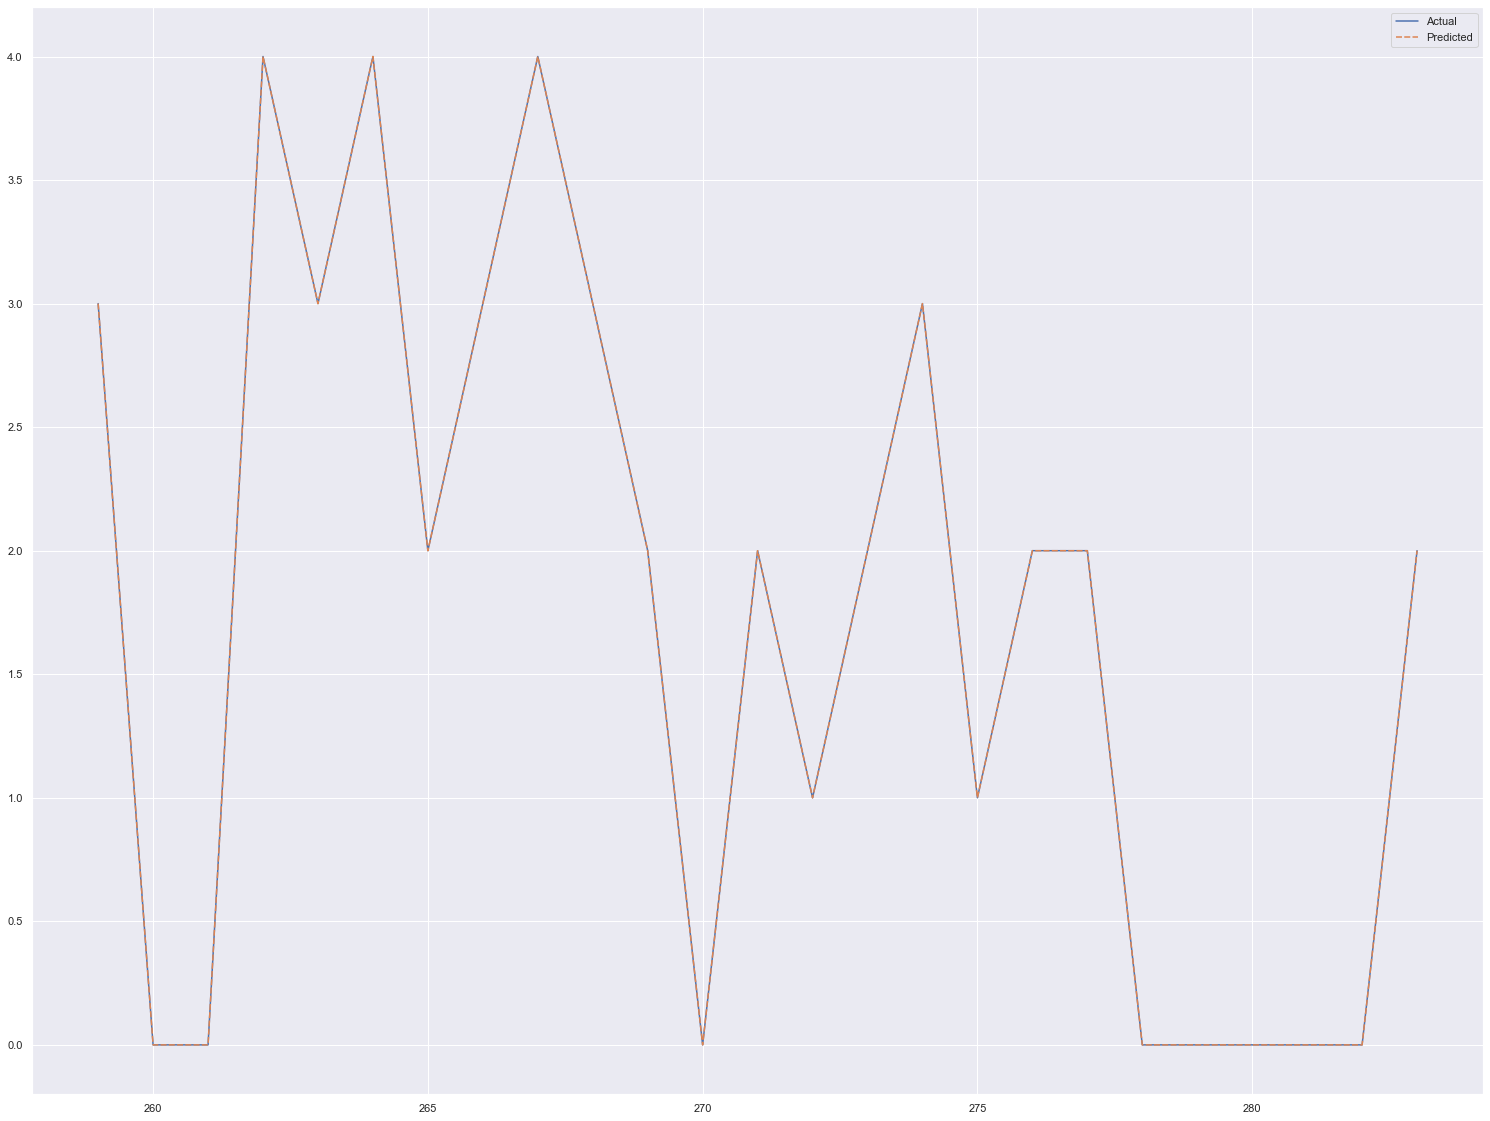

In [116]:
sns.lineplot(data=df1)

In [117]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore") #ignore warnings
sns.set(rc={'figure.figsize':(10,6)})
confusion_matrix = confusion_matrix(y_test, y_pred_test1)
print(confusion_matrix)

[[73  0  1  2  0]
 [ 0 43  1  0  0]
 [ 0  0 39  0  0]
 [ 2  0  0 77  0]
 [ 0  2  0  2 42]]


In [118]:
#SVM (RBF) and SVM(poly) both have almost similar accuracy but SVM with polynomial kernel is the better one
print('Model accuracy: {:.2f}%'.format(model.score(balanced_X, balanced_y)*100))
print('Model accuracy: {:.2f}%'.format(model1.score(balanced_X, balanced_y)*100))
# SVM - with polynomial kernel is the best model for making predictions

Model accuracy: 98.54%
Model accuracy: 98.85%


<h3>Sample Prediction</h3>

In [119]:
#Song name- Rockabye (feat. Sean Paul & Anne-Marie)
#features=['danceability','valence','tempo','energy','acousticness','instrumentalness'] 
Feature_param_rockabye=[0.711449,0.748274,0.294788,0.765649,0.411332,0.000000]
model.predict([Feature_param_rockabye])

array([0])

In [120]:
model1.predict([Feature_param_rockabye])

array([0])